# Employee-Data-Insights - HR Analytics Prediction: Why do People Resign?

The project, **Employee-Data-Insights - Attrition**, analyzes factors driving employee attrition to identify patterns and trends, enabling HR to make data-driven decisions to reduce turnover, improve retention, and enhance workforce stability.

## Project Aim

The primary objective is to identify key factors influencing employee attrition and provide actionable insights to improve retention strategies. Specifically:
- Determine demographic, professional, and behavioral factors associated with higher attrition rates.
- Develop predictive models to forecast future attrition risks.
- Recommend strategies to mitigate identified risks and improve employee satisfaction and loyalty.

## Employee Attrition Analysis Overview

#### **Required Columns**
- **Demographics**: `Age`, `Gender`, `MaritalStatus`
- **Job-related**: `Department`, `JobRole`, `PerformanceRating`, `MonthlyIncome`, `YearsAtCompany`
- **Behavioral**: `EnvironmentSatisfaction`, `JobSatisfaction`, `OverTime`
- **Target Variable**: `Attrition` (0 = Active, 1 = Terminated)

#### **Analysis Breakdown**
1. **Data Exploration & Cleaning**: Handle missing values, outliers, and engineer features.
2. **Descriptive Statistics**: Summarize and visualize key variables.
3. **Attrition Rate Analysis**: Calculate attrition rates by all factors.
4. **Correlation Analysis**: Identify relationships between predictors and attrition.
5. **Predictive Modeling**: Build models to predict attrition using key predictors.
6. **Cluster Analysis**: Group employees based on attrition-related attributes.
7. **Survival Analysis**: Estimate time until attrition and identify tenure-impacting factors.

#### **Recommendations**
- Provide actionable insights to reduce attrition and improve retention.
- Suggest interventions to enhance employee engagement and stability.

*This structured approach ensures comprehensive insights into employee attrition.*

## Load libraries

In [61]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import lifelines
import importlib
#from pandas_profiling import ProfileReport

In [62]:
import sys
import os

scripts_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'scripts'))
sys.path.append(scripts_path)
import hrattrition
from hrattrition import data_quality_check, initial_eda, descriptive_statistics, correlation_analysis, predictive_modeling, cluster_analysis, survival_analysis, attrition_rate_analysis
import data_cleaning as dc

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)

## Data Load, Cleaning and Initial Exploration

### Import  Kaggle API fx and Load data

In [63]:
import kaggleloader as kr
importlib.reload(kr)

data =kr.fetch_kaggle_dataset(search_query="ibm-hr-analytics-attrition")
data.head()


🔹 Available Datasets:

Dataset 1: pavansubhasht/ibm-hr-analytics-attrition-dataset - IBM HR Analytics Employee Attrition & Performance
Files:
  - WA_Fn-UseC_-HR-Employee-Attrition.csv (Size: 227977 bytes)

Dataset 2: uniabhi/ibm-hr-analytics-employee-attrition-performance - IBM HR Analytics Employee Attrition & Performance
Files:
  - WA_Fn-UseC_-HR-Employee-Attrition.csv (Size: 227977 bytes)

Dataset 3: rushikeshghate/capstone-projectibm-employee-attrition-prediction - Capstone Project-IBM Employee Attrition Prediction
Files:
  - IBM HR Data new.csv (Size: 4382335 bytes)
  - IBM HR analytics_Complete Model_.ipynb (Size: 1371463 bytes)

Dataset 4: ramjaslangdi/ibm-hr-analytics-attrition-dataset - ibm-hr-analytics-attrition-dataset
Files:
  - WA_Fn-UseC_-HR-Employee-Attrition.csv (Size: 227977 bytes)

Dataset 5: raneemoqaily/ibm-hr-analytics-employee-attrition-performance - IBM HR Analytics Employee Attrition & Performance
Files:
  - WA_Fn-UseC_-HR-Employee-Attrition.csv (Size: 227977 b


Enter the number of the dataset you want to use:  4



✅ Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int6

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Generate automated EDA report
profile = ProfileReport(raw_df, title="Raw Data EDA")
profile.to_file("raw_data_eda.html")

#### Data Quality Checks

Outlier detection:


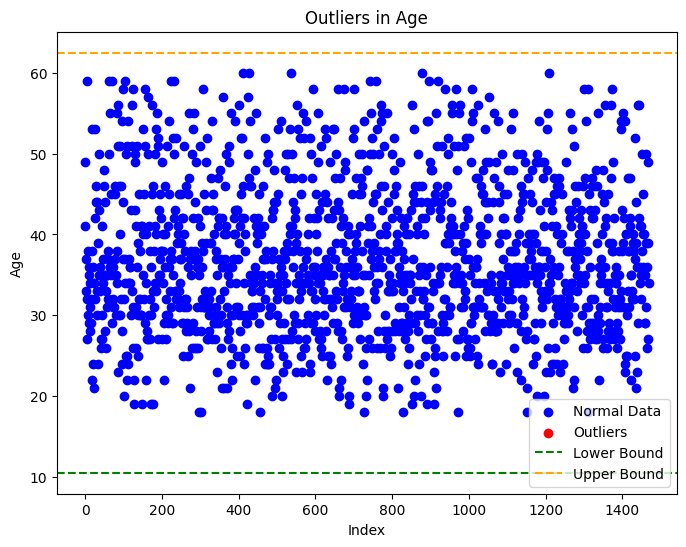

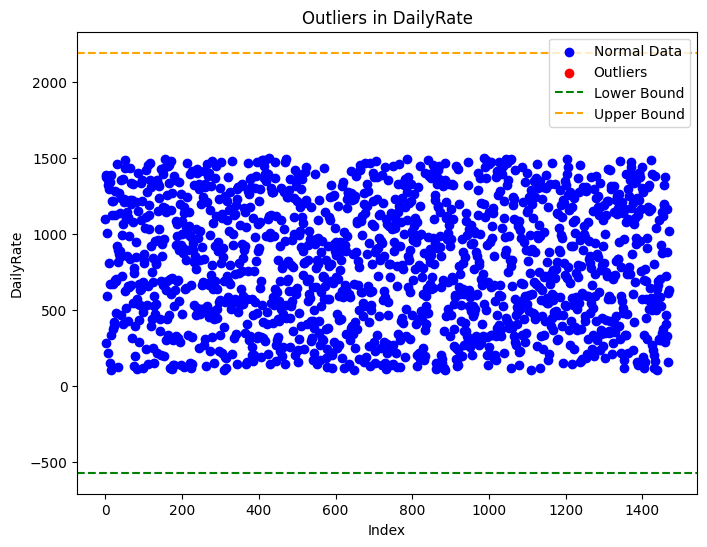

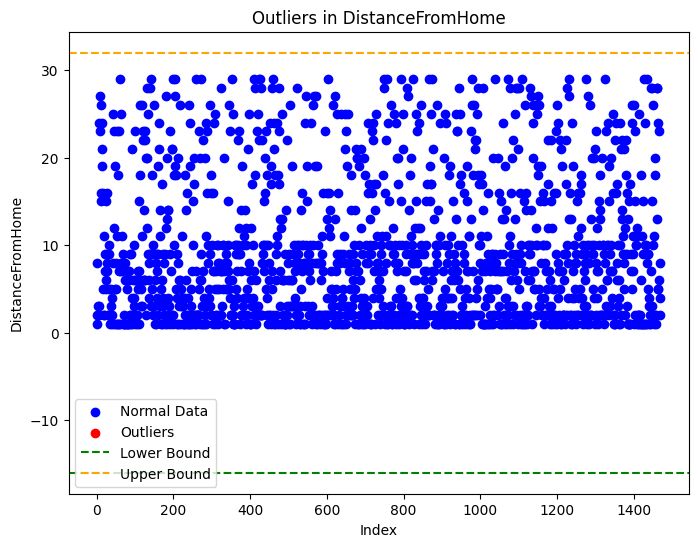

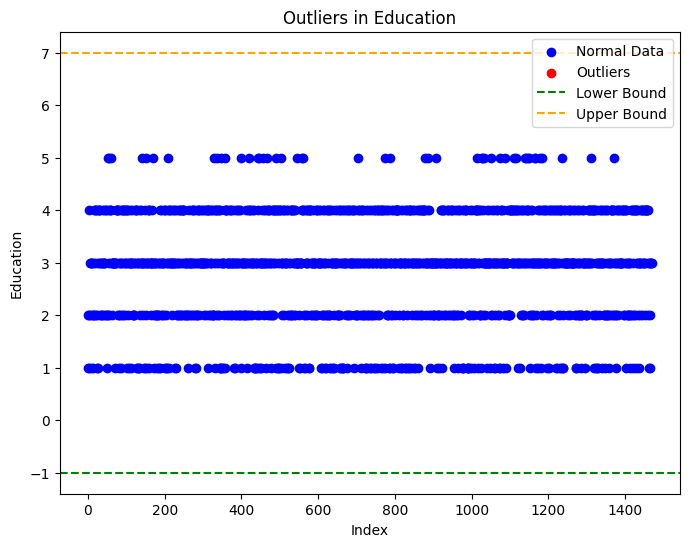

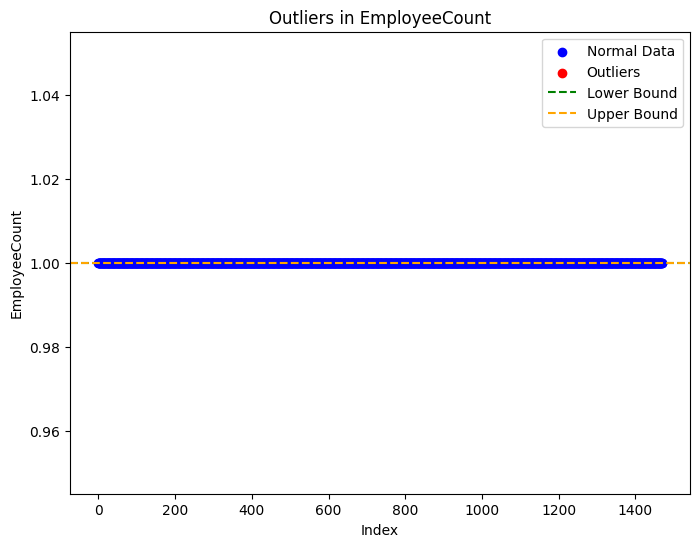

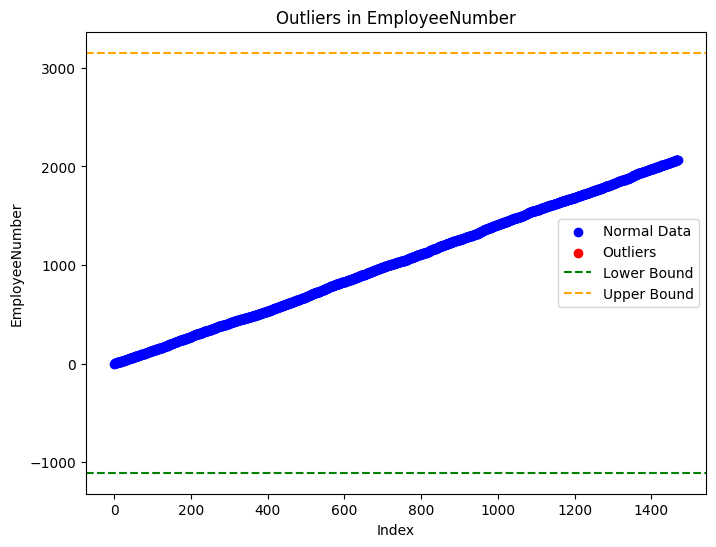

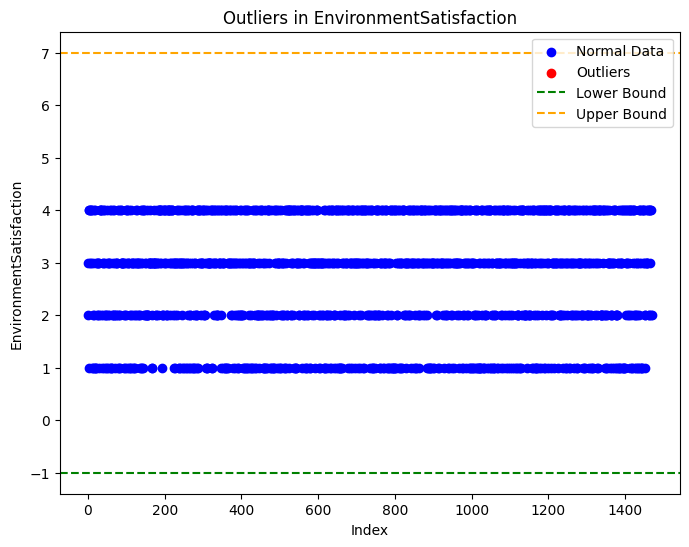

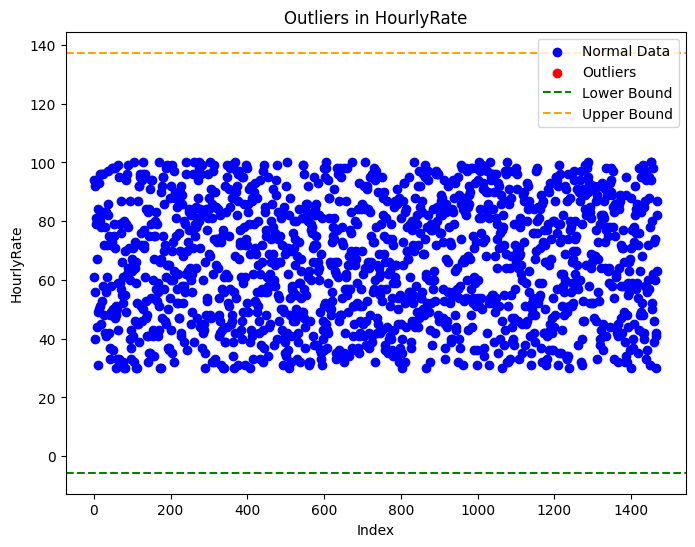

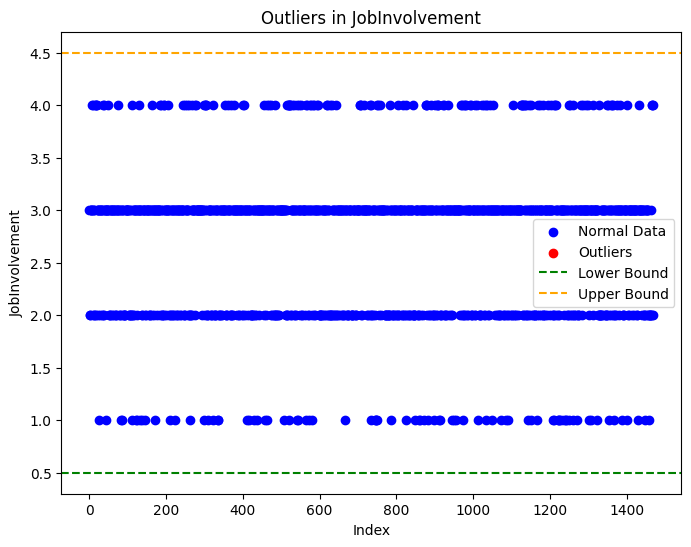

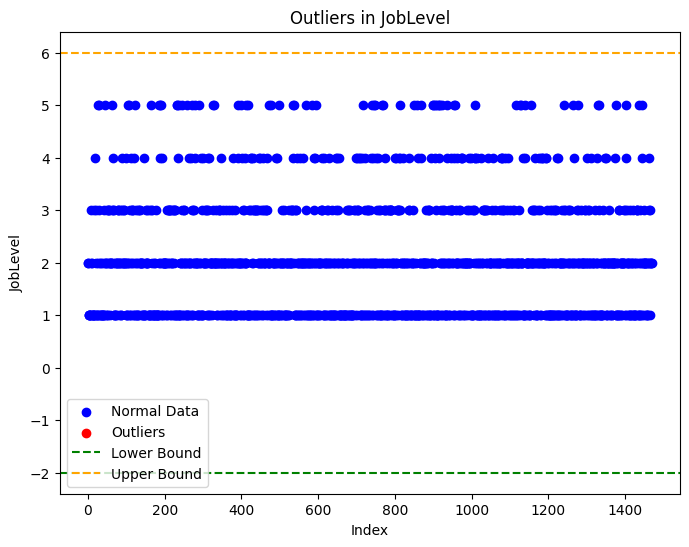

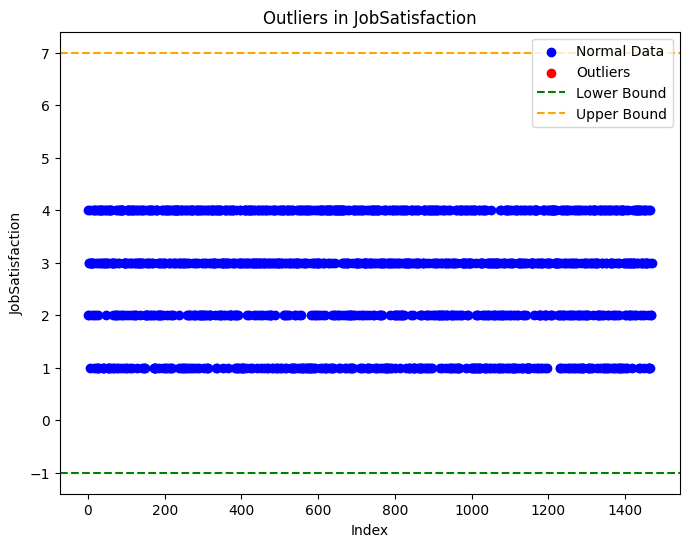

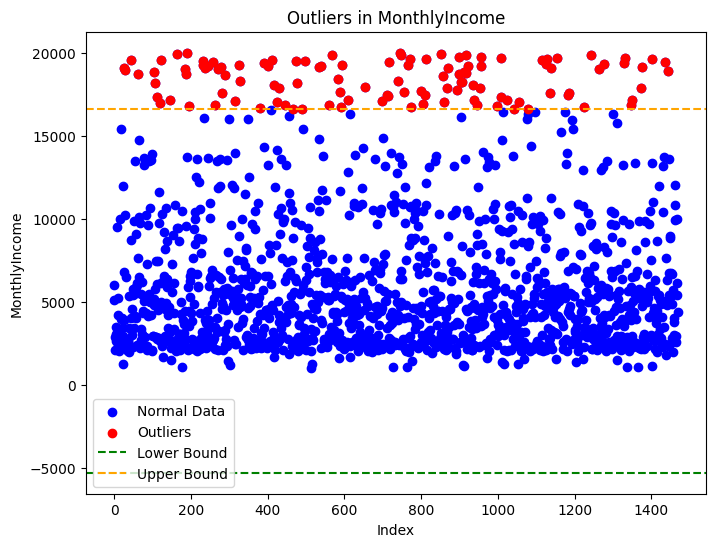

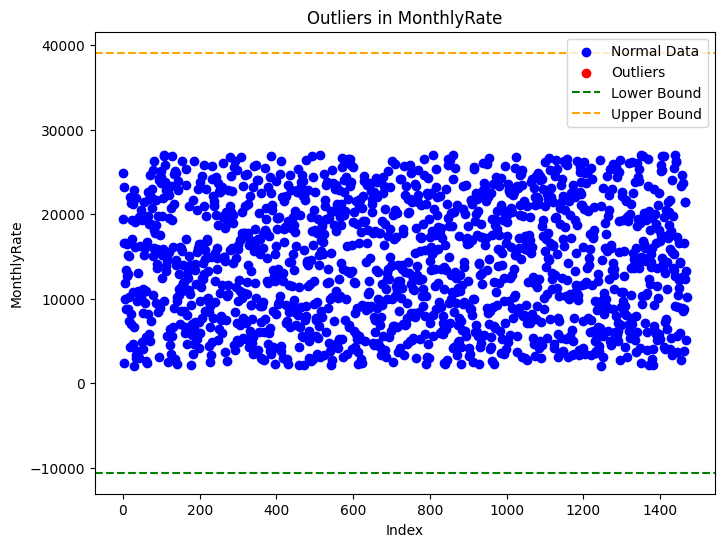

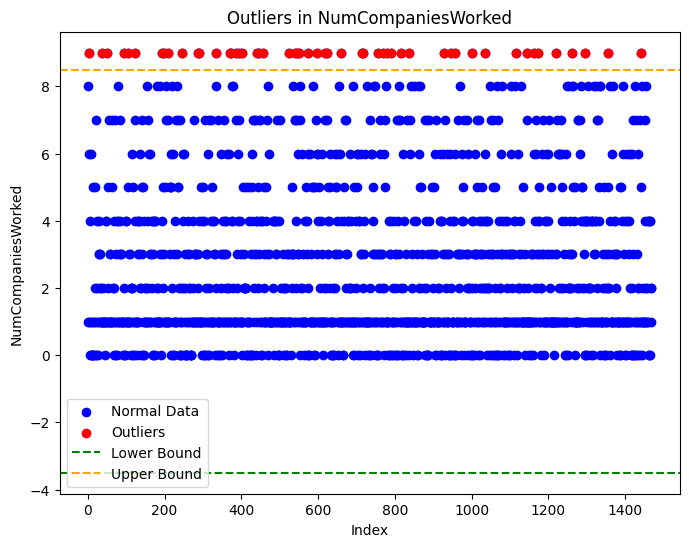

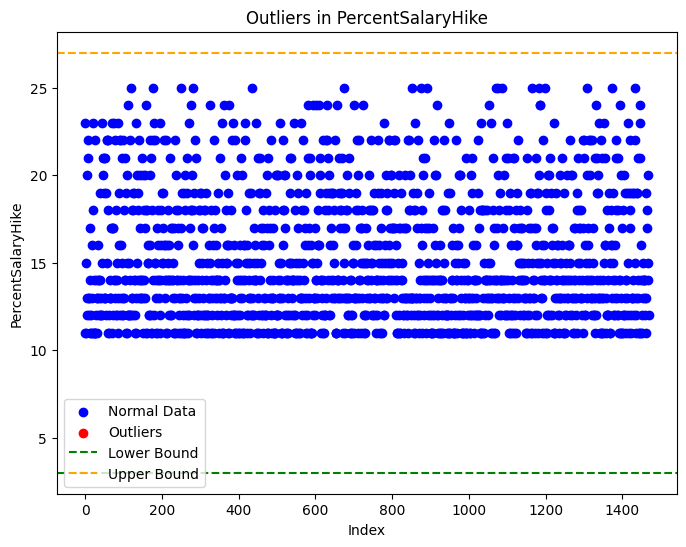

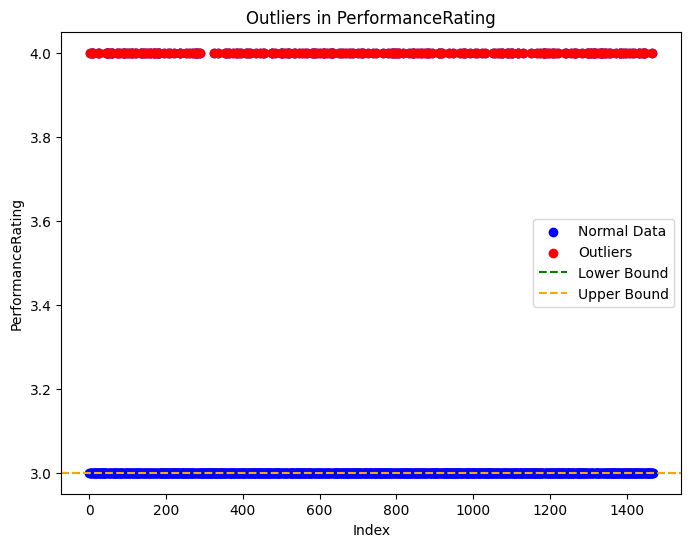

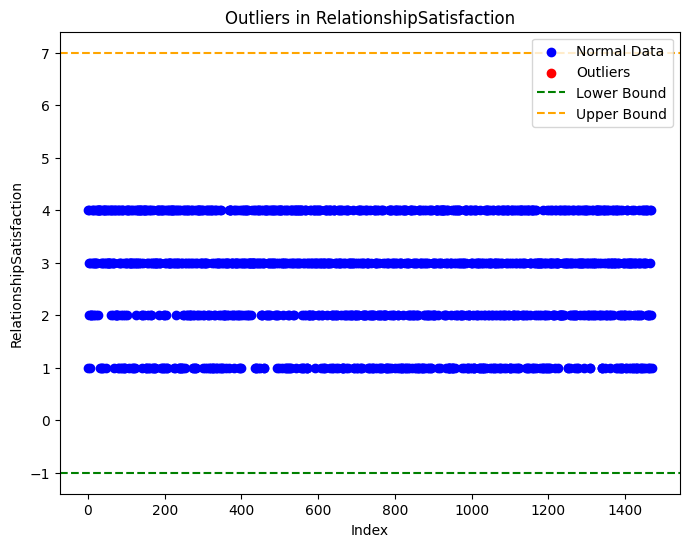

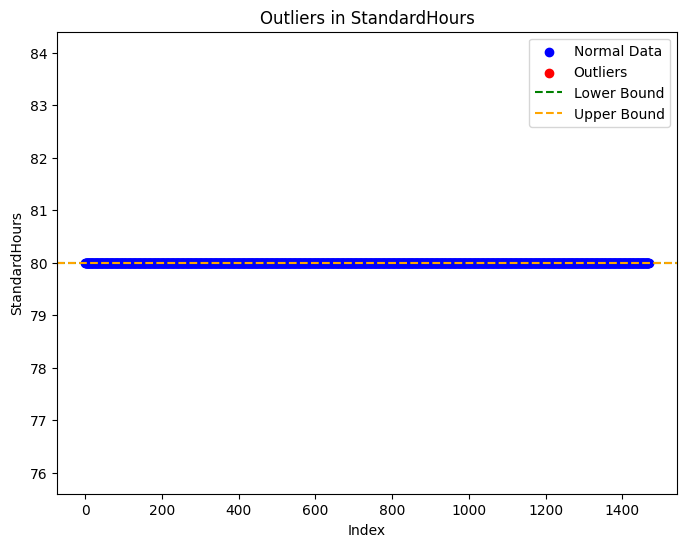

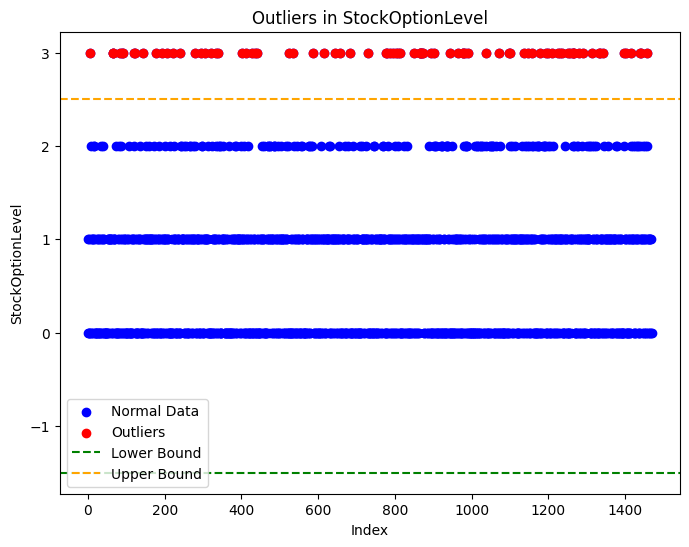

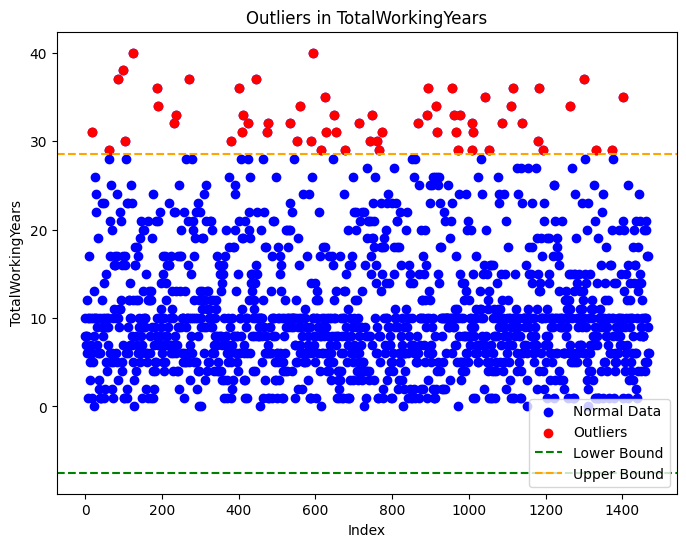

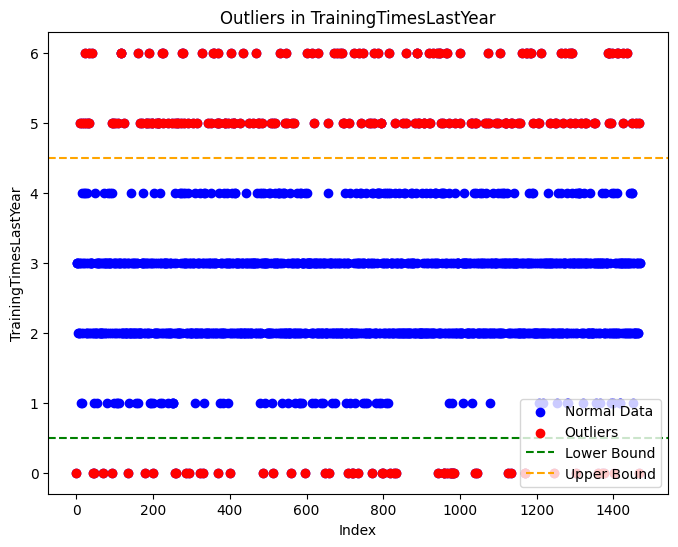

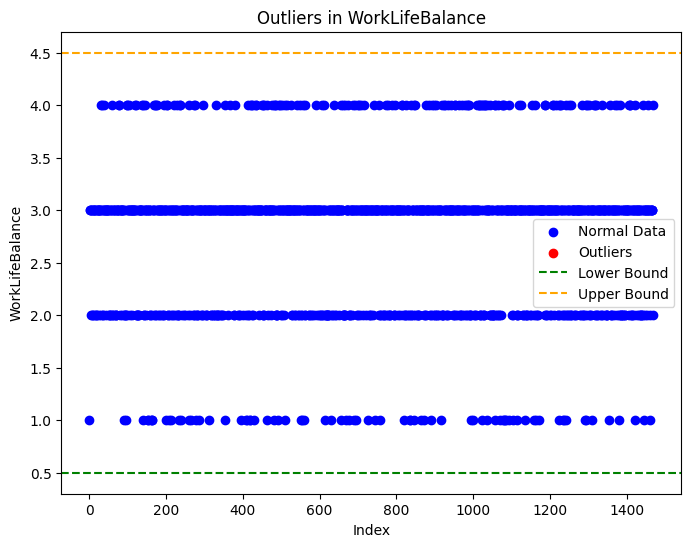

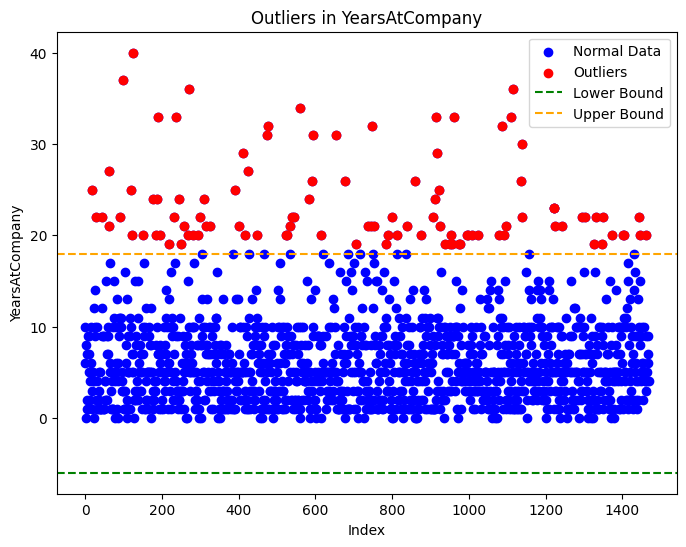

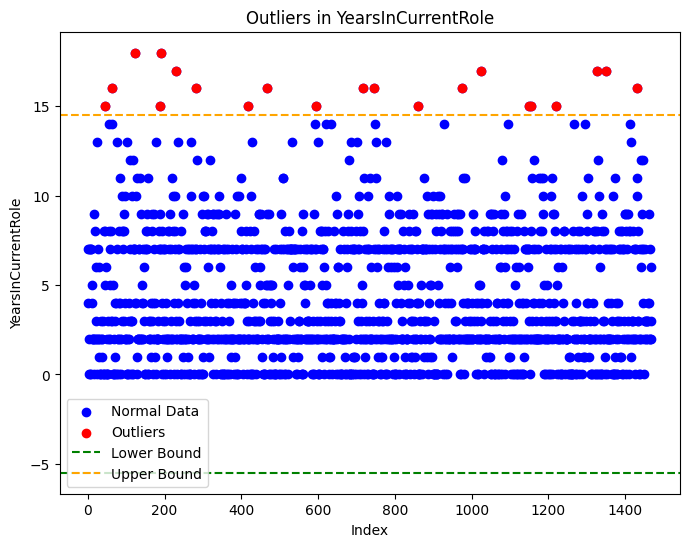

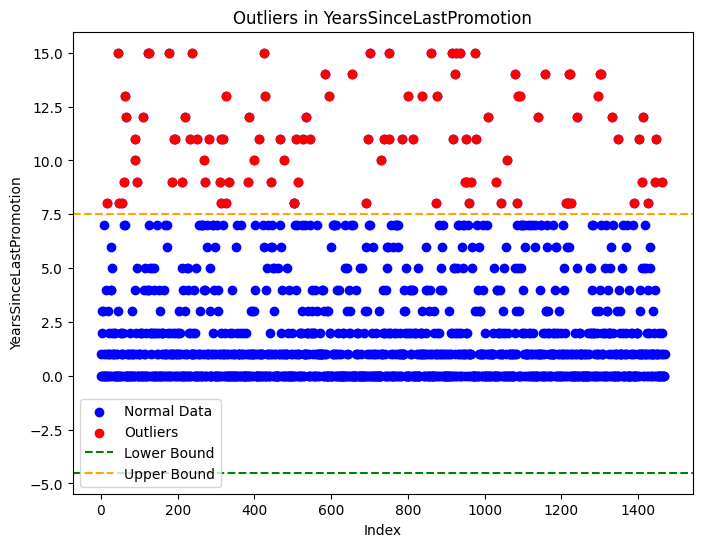

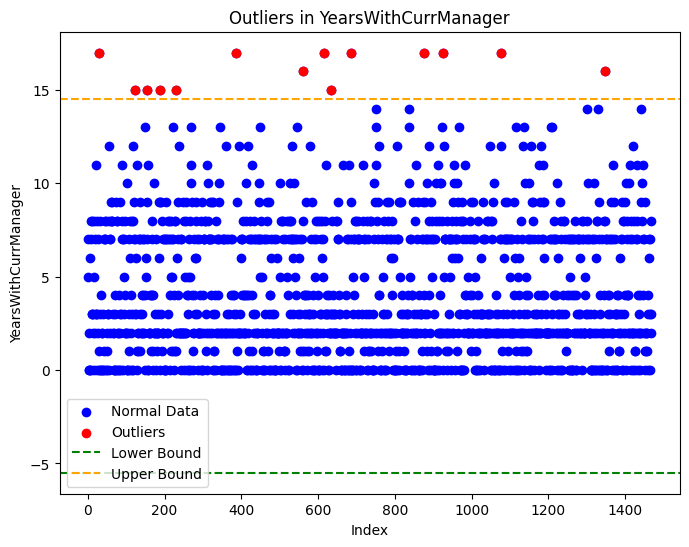

Missing Values:
No missing values.

Unique Values in Categorical Columns:
           Column  Unique Values
0       Attrition              2
1  BusinessTravel              3
2      Department              3
3  EducationField              6
4          Gender              2
5         JobRole              9
6   MaritalStatus              3
7          Over18              1
8        OverTime              2

Duplicate Rows:
Number of duplicate rows: 0

Invalid Values:
Column 'Attrition' has the following:
  - No
  - Yes
Column 'BusinessTravel' has the following:
  - Travel_Rarely
  - Travel_Frequently
  - Non-Travel
Column 'Department' has the following:
  - Research & Development
  - Sales
  - Human Resources
Column 'EducationField' has the following:
  - Life Sciences
  - Medical
  - Marketing
  - Technical Degree
  - Other
  - Human Resources
Column 'Gender' has the following:
  - Male
  - Female
Column 'JobRole' has the following:
  - Sales Executive
  - Research Scientist
  - Laboratory 

In [64]:
quality_check_results = data_quality_check(data)

print("Missing Values:")
print(quality_check_results['missing_values'])

print("\nUnique Values in Categorical Columns:")
print(quality_check_results['unique_values'])

print("\nDuplicate Rows:")
print(quality_check_results['duplicate_rows'])

print("\nInvalid Values:")
for col, issues in quality_check_results['invalid_values'].items():
    print(f"Column '{col}' has the following:")
    for issue in issues:
        print(f"  - {issue}")
 

### Data Cleaning and PreProcessing

#### Handling Anomalies - Summary
1. **Filter Outliers**: Remove or correct unrealistic dates.
2. **Correct Errors**: Fix typos and patterns (e.g., 2060 → 1960).
3. **Manual Review**: Verify anomalies using other sources or direct contact.
4. **Data Validation**: Implement rules to prevent future anomalies.
5. **Remove Irrelevant Columns**: Eliminate columns that are not useful.
6. **Encode Categorical Variables**: Encode binary and multi-level categorical columns.
7. **Scale Numerical Columns**: Standardize or normalize numerical columns.
8. **Convert Date Columns**: Ensure date columns have correct data types.
9. **Resolve Inconsistencies**: Address column names and valid values inconsistencies.
10. **Handle Missing Values**: Choose to drop or fill missing values.

#### Create variables and Clean data

In [67]:
importlib.reload(dc)

<module 'data_cleaning' from 'D:\\Portfolio\\my_projects\\DataAnalysis\\scripts\\data_cleaning.py'>

In [69]:
# Auto-detect columns
config = dc.detect_columns(data)
current_date = pd.Timestamp(datetime.now())
current_year = pd.Timestamp.now().year  # Get the current year

# Fill missing values (default)
hrdata = dc.clean_data(data.copy(), config)
    
# Example 2: Drop rows with missing values
#hrdata = clean_data(data.copy(), config, missing_strategy='drop')

hrdata.head()

🔍 Detected columns:
- Dates: []
- Numerical: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
- Binary: ['Attrition', 'Gender', 'OverTime']
- Multi-category: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
- Irrelevant: ['Over18']

🚀 Starting cleaning (missing strategy: fill)...
✅ Removed 1 irrelevant columns
✅ Filled 0 missing values
✅ Removed 0 duplicate rows


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Feature Engineering


In [72]:
# Define age group bins and labels
bins = [0, 20, 30, 40, 50, 60, 70, 100]  # Adding 0 and 100 to cover all possible ages
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
hrdata['AgeGroup'] = pd.cut(hrdata['Age'], bins=bins, labels=labels, right=False) # Create AgeGroup column

# Define salary group bins and labels
salary_bins = [0, 45046, 70000, 100000, 150000, 200000, 250000]  # Adjusted bins to cover salary ranges
salary_labels = ['<45K', '45K-70K', '70K-100K', '100K-150K', '150K-200K', '200K+']
hrdata['SalaryGroup'] = pd.cut(hrdata['MonthlyIncome'], bins=salary_bins, labels=salary_labels, right=False)  # Create SalaryGroup column

print("\nData Overview After Initial Feature Engineering:")
hrdata.head()

#hrdata_cleaned.to_csv('cleaned_hr_dataset.csv', index=False) # Export cleaned data



Data Overview After Initial Feature Engineering:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup,SalaryGroup
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,40-49,<45K
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,40-49,<45K
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,30-39,<45K
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,30-39,<45K
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,20-29,<45K


### Initial EDA

In [ ]:
#!pip uninstall numpy

                                             |                | [  0%]   00:00 -> (? left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

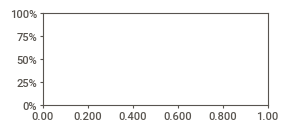

In [73]:
initial_eda(hrdata)

## Descriptive Statistics


### Basic Statistics for Key Variables


Summary for marriedid:
count    311.000000
mean       0.398714
std        0.490423
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: marriedid, dtype: float64


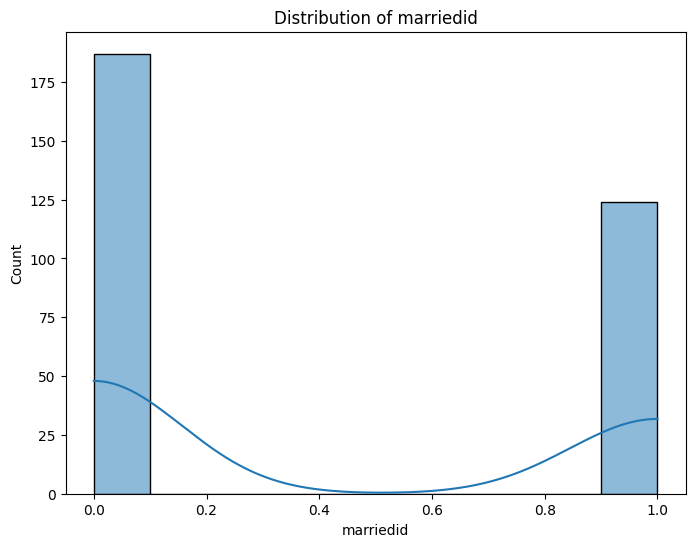


Summary for maritalstatusid:
count    311.000000
mean       0.810289
std        0.943239
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: maritalstatusid, dtype: float64


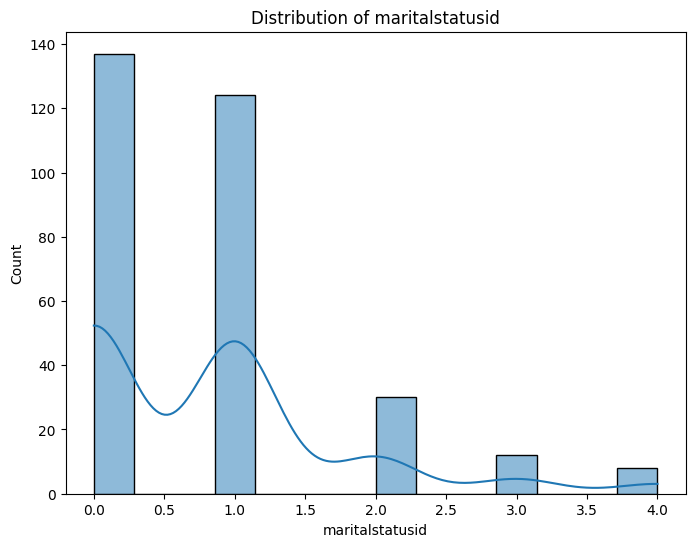


Summary for genderid:
count    311.000000
mean       0.434084
std        0.496435
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: genderid, dtype: float64


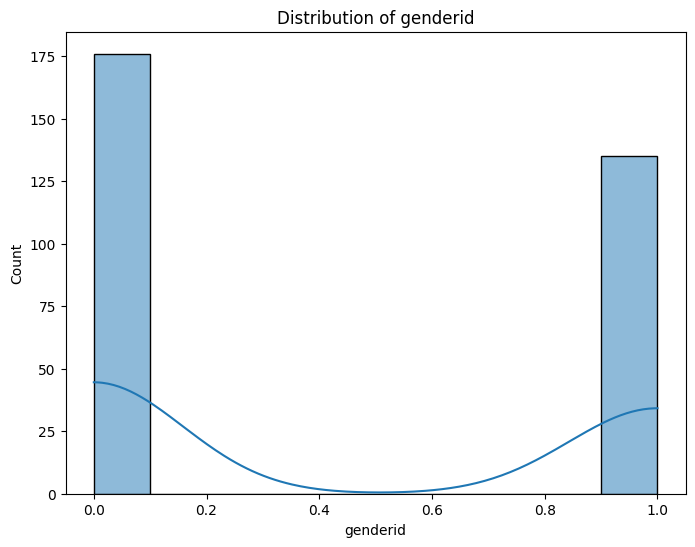


Summary for empstatusid:
count    311.000000
mean       2.392283
std        1.794383
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max        5.000000
Name: empstatusid, dtype: float64


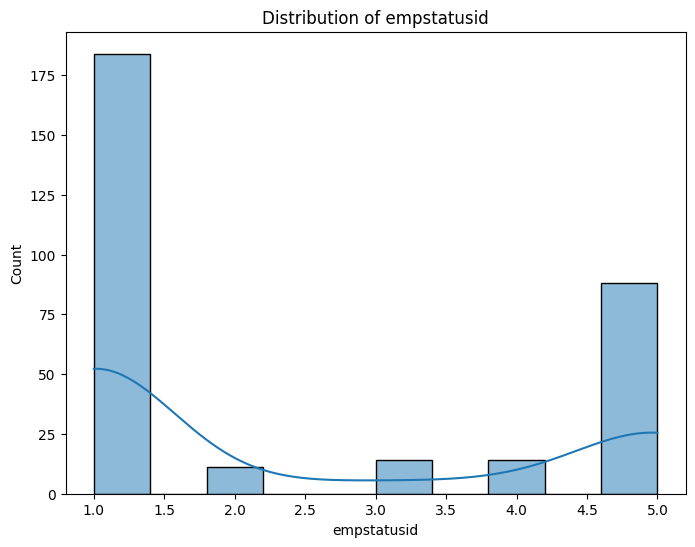


Summary for deptid:
count    311.000000
mean       4.610932
std        1.083487
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        6.000000
Name: deptid, dtype: float64


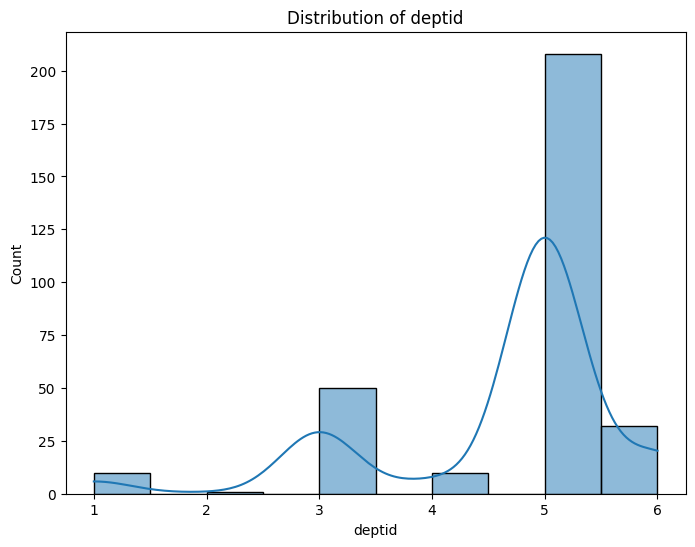


Summary for perfscoreid:
count    311.000000
mean       2.977492
std        0.587072
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: perfscoreid, dtype: float64


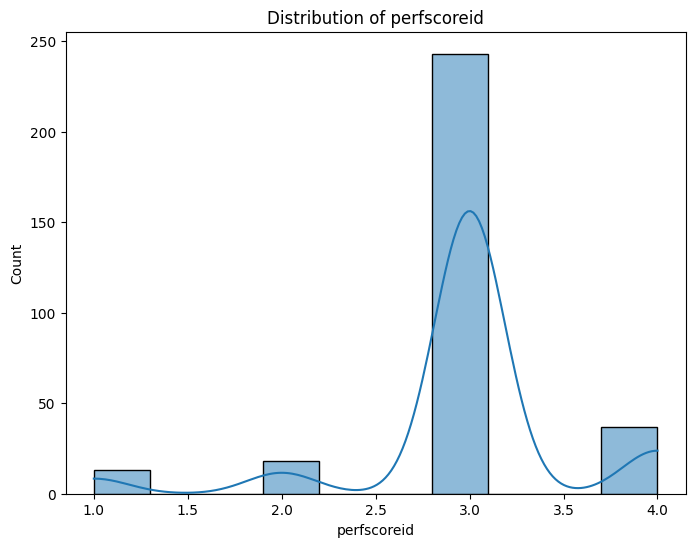


Summary for fromdiversityjobfairid:
count    311.000000
mean       0.093248
std        0.291248
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fromdiversityjobfairid, dtype: float64


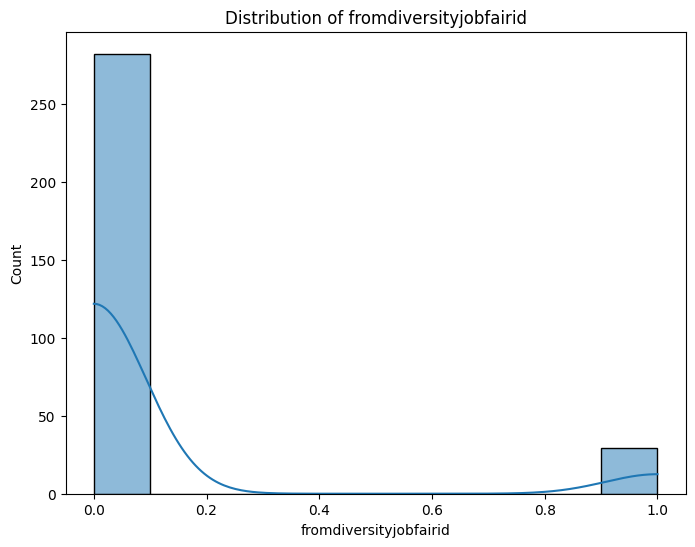


Summary for salary:
count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: salary, dtype: float64


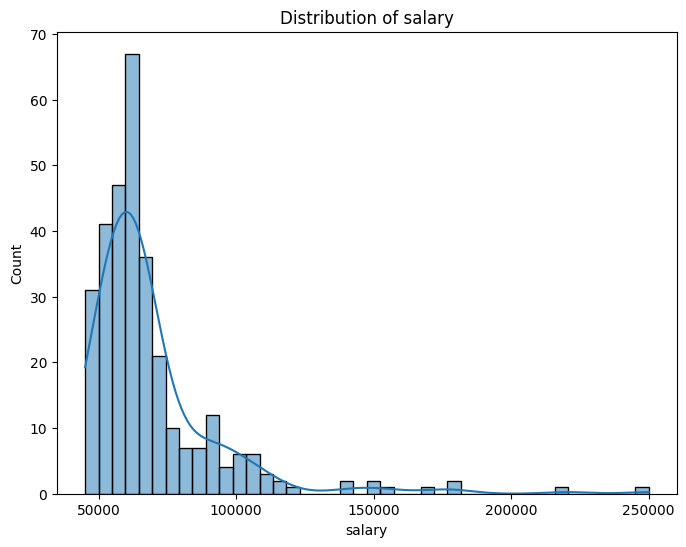


Summary for attrition:
count    311.000000
mean       0.334405
std        0.472542
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: attrition, dtype: float64


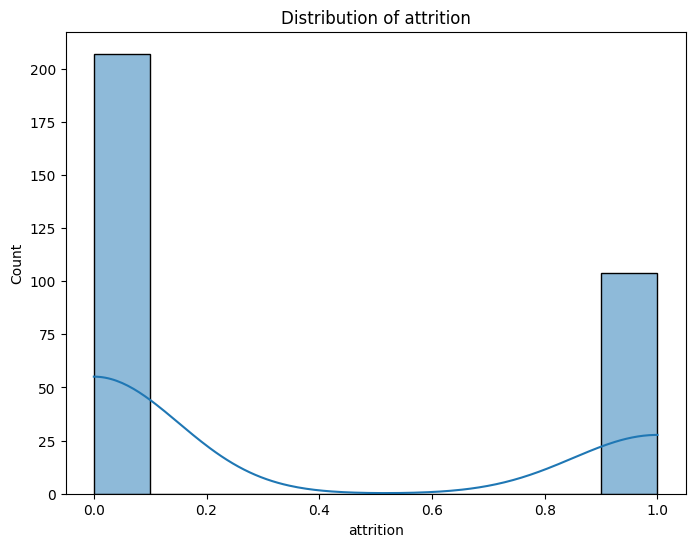


Summary for positionid:
count    311.000000
mean      16.845659
std        6.223419
min        1.000000
25%       18.000000
50%       19.000000
75%       20.000000
max       30.000000
Name: positionid, dtype: float64


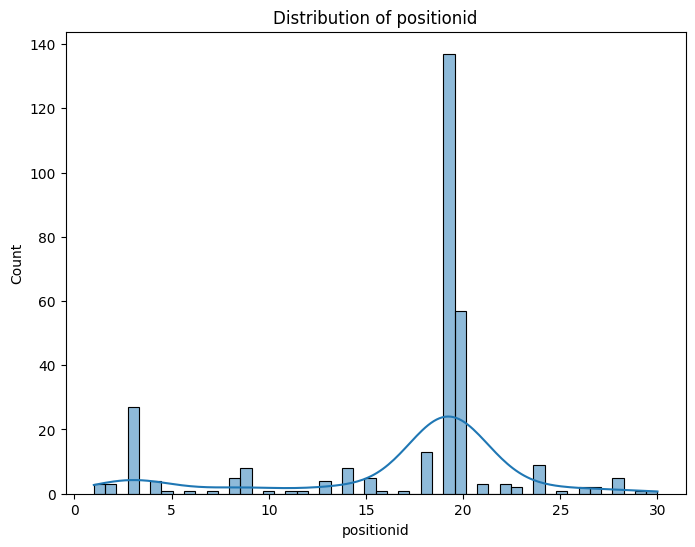


Summary for managerid:
count    311.000000
mean      14.170418
std        8.346907
min       -1.000000
25%        9.500000
50%       14.000000
75%       19.000000
max       39.000000
Name: managerid, dtype: float64


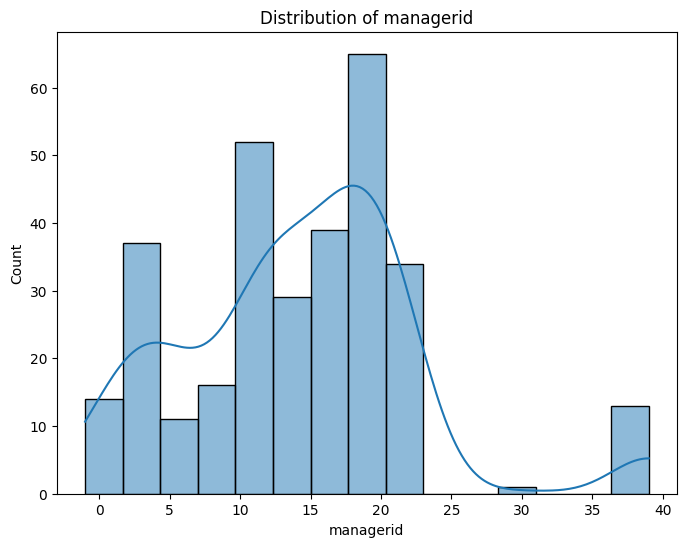


Summary for engagementsurvey:
count    311.000000
mean       4.110000
std        0.789938
min        1.120000
25%        3.690000
50%        4.280000
75%        4.700000
max        5.000000
Name: engagementsurvey, dtype: float64


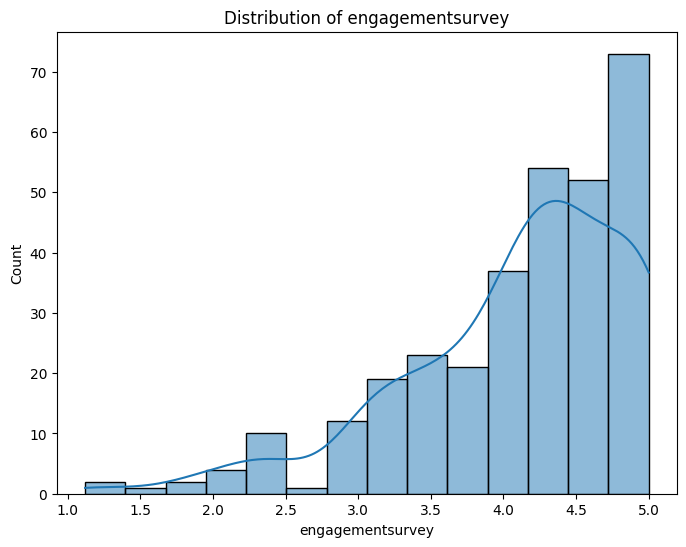


Summary for empsatisfaction:
count    311.000000
mean       3.890675
std        0.909241
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: empsatisfaction, dtype: float64


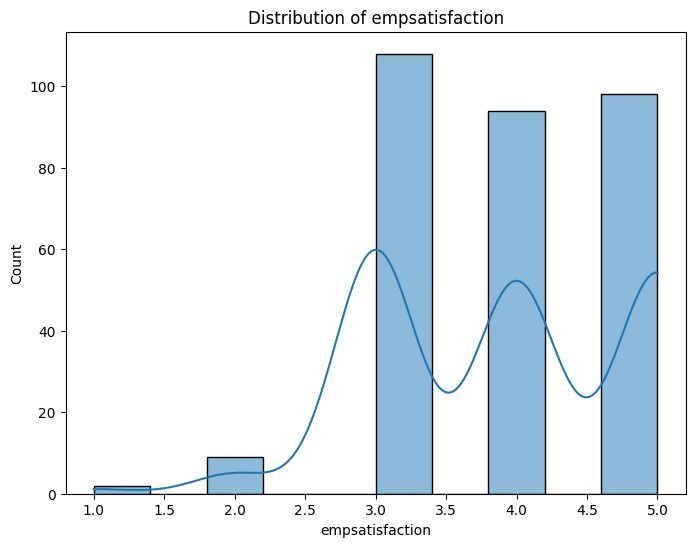


Summary for specialprojectscount:
count    311.000000
mean       1.218650
std        2.349421
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        8.000000
Name: specialprojectscount, dtype: float64


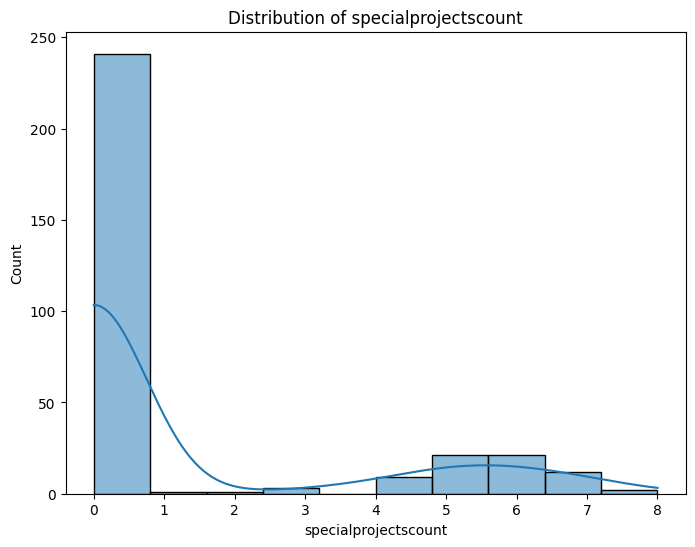


Summary for dayslatelast30:
count    311.000000
mean       0.414791
std        1.294519
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: dayslatelast30, dtype: float64


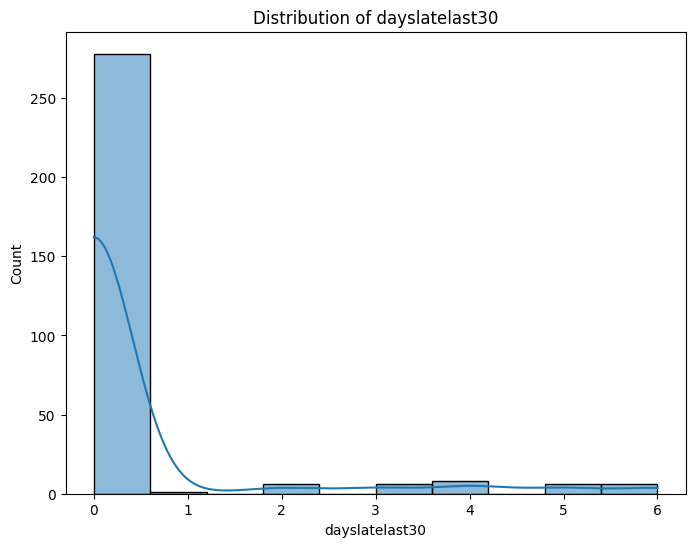


Summary for absences:
count    311.000000
mean      10.237942
std        5.852596
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       20.000000
Name: absences, dtype: float64


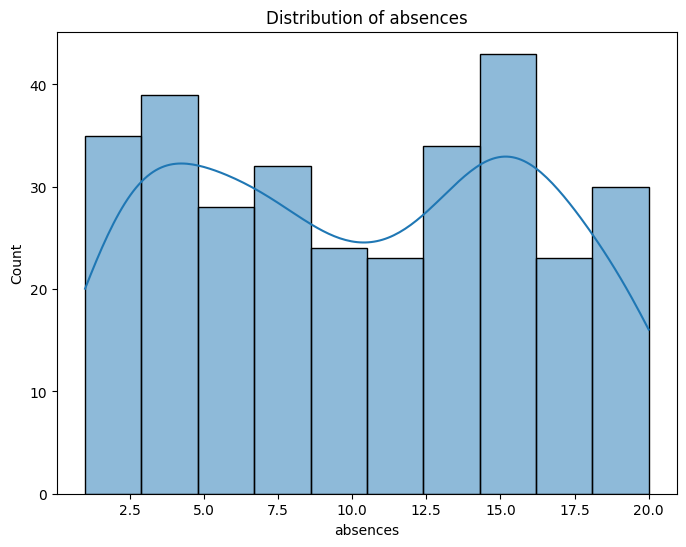


Summary for age:
count    311.000000
mean      45.533762
std        8.926112
min       32.000000
25%       38.000000
50%       44.000000
75%       51.000000
max       74.000000
Name: age, dtype: float64


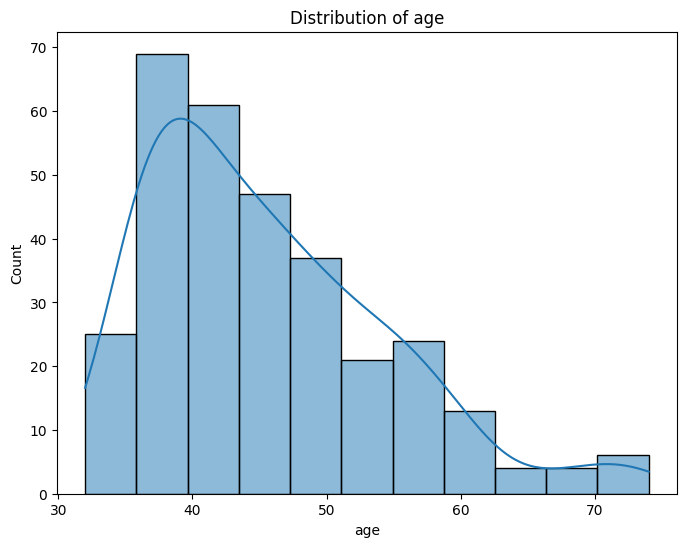


Summary for years_employed:
count    311.000000
mean       8.376206
std        4.261979
min        0.000000
25%        4.500000
50%       10.000000
75%       11.000000
max       19.000000
Name: years_employed, dtype: float64


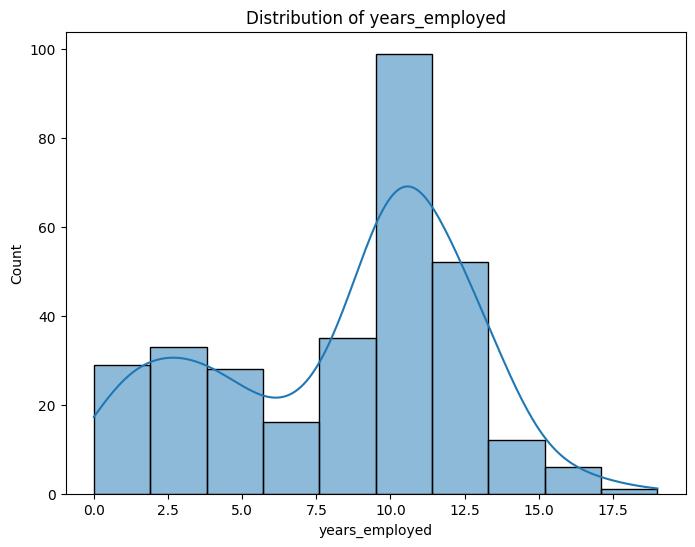


Frequency for position:
position
Production Technician I         137
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                      7
Database Administrator            5
Sr. Network Engineer              5
Network Engineer                  5
BI Developer                      4
Accountant I                      3
Administrative Assistant          3
Sales Manager                     3
Senior BI Developer               3
Sr. Accountant                    2
Sr. DBA                           2
IT Manager - DB                   2
Software Engineering Manager      1
Enterprise Architect              1
Director of Operations            1
BI Director                       1
IT Manager - Support              1
IT Director                       1
President & CEO                   1
Director of Sales                 1
IT Manager - Infra            

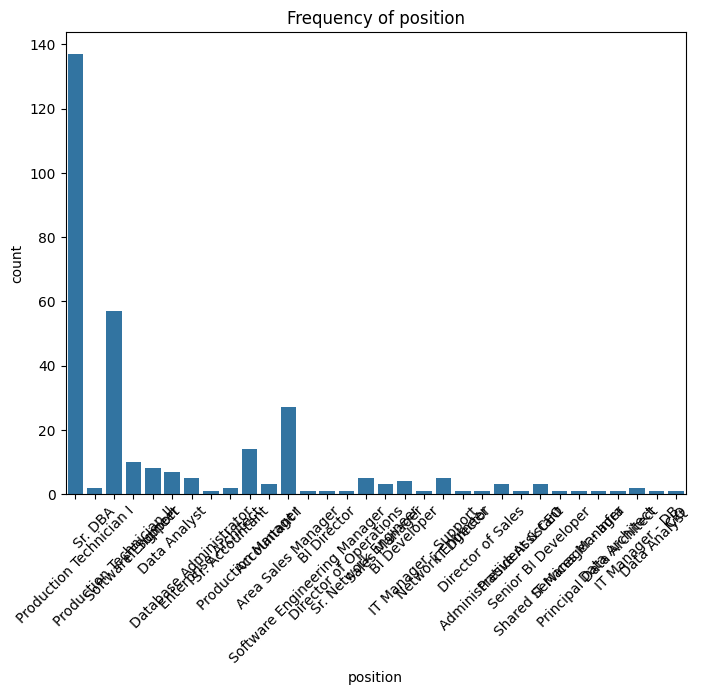


Frequency for state:
state
MA    276
CT      6
TX      3
VT      2
VA      1
AL      1
WA      1
CA      1
OH      1
IN      1
TN      1
NH      1
RI      1
PA      1
CO      1
NY      1
UT      1
GA      1
FL      1
NC      1
KY      1
ID      1
NV      1
MT      1
OR      1
ND      1
AZ      1
ME      1
Name: count, dtype: int64


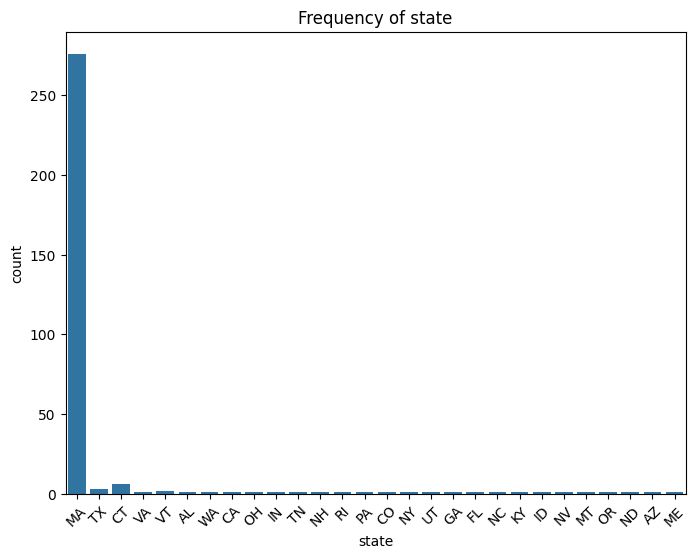


Frequency for sex:
sex
Female    176
Male      135
Name: count, dtype: int64


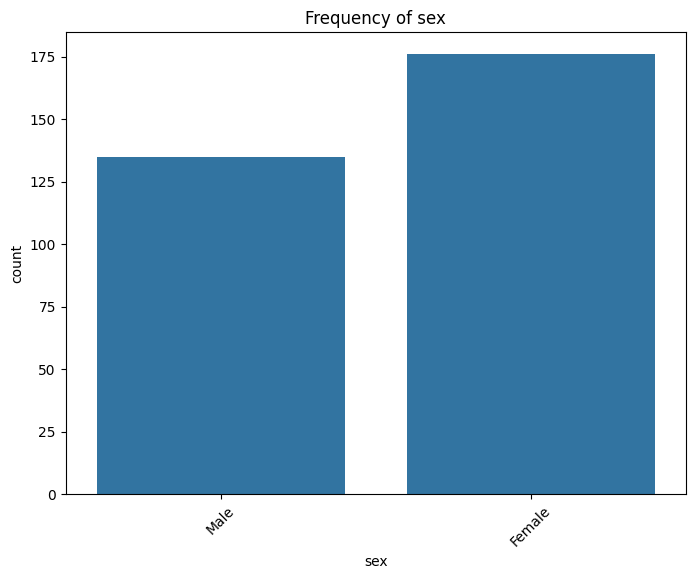


Frequency for maritaldesc:
maritaldesc
Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: count, dtype: int64


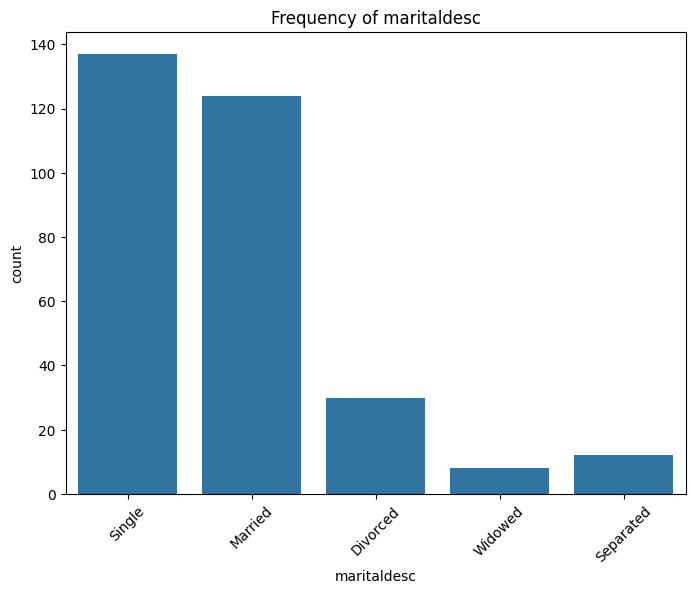


Frequency for citizendesc:
citizendesc
US Citizen             295
Eligible NonCitizen     12
Non-Citizen              4
Name: count, dtype: int64


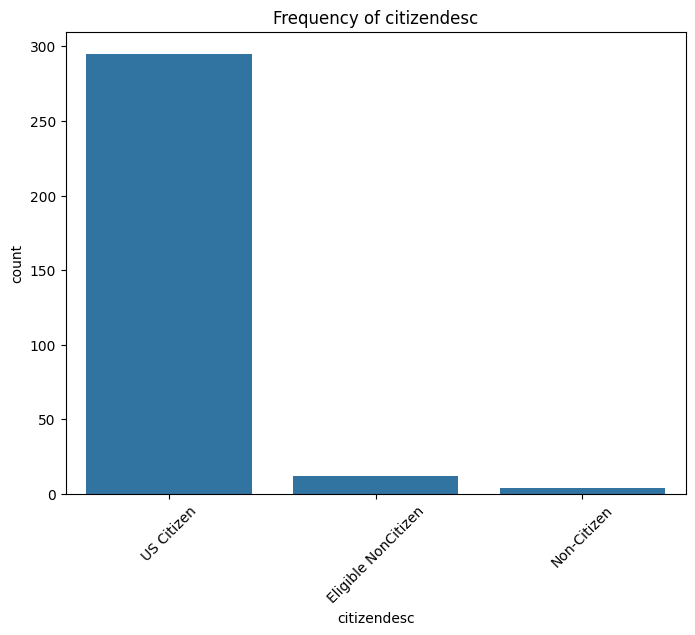


Frequency for hispaniclatino:
hispaniclatino
No     282
Yes     27
no       1
yes      1
Name: count, dtype: int64


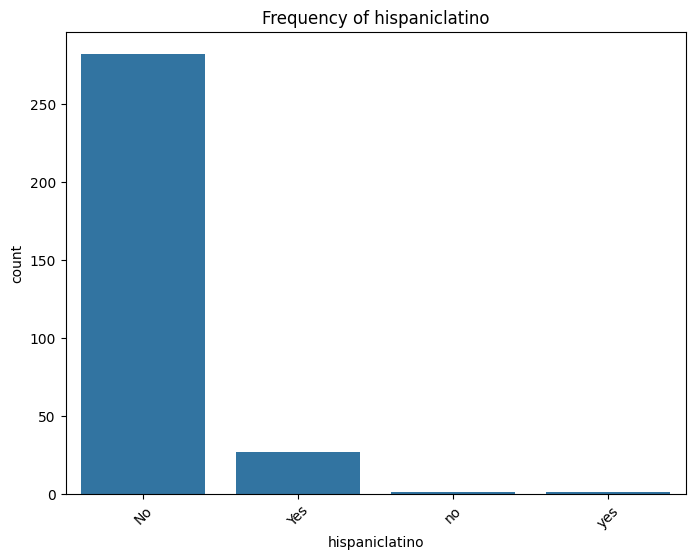


Frequency for racedesc:
racedesc
White                               187
Black or African American            80
Asian                                29
Two or more races                    11
American Indian or Alaska Native      3
Hispanic                              1
Name: count, dtype: int64


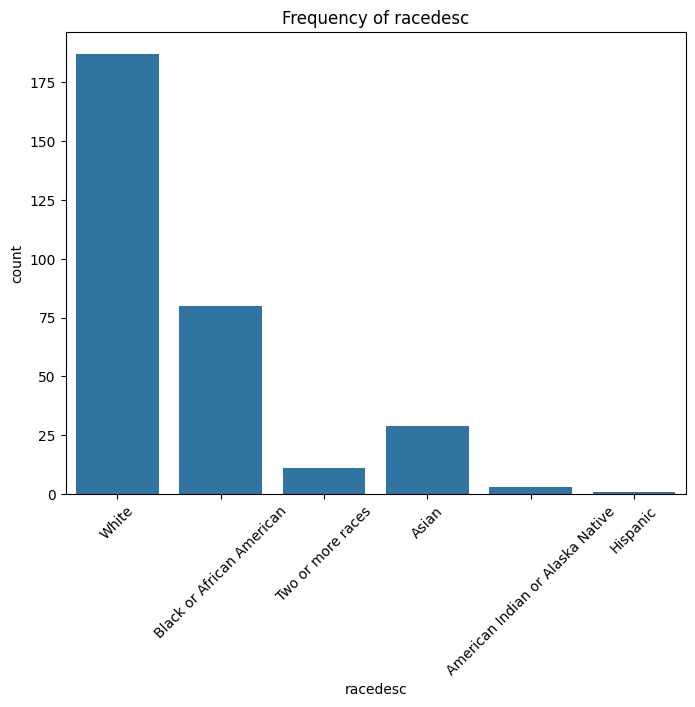


Frequency for termreason:
termreason
N/A-StillEmployed                   207
Another position                     20
unhappy                              14
more money                           11
career change                         9
hours                                 8
attendance                            7
return to school                      5
relocation out of area                5
performance                           4
military                              4
retiring                              4
no-call, no-show                      4
maternity leave - did not return      3
medical issues                        3
Learned that he is a gangster         1
Fatal attraction                      1
gross misconduct                      1
Name: count, dtype: int64


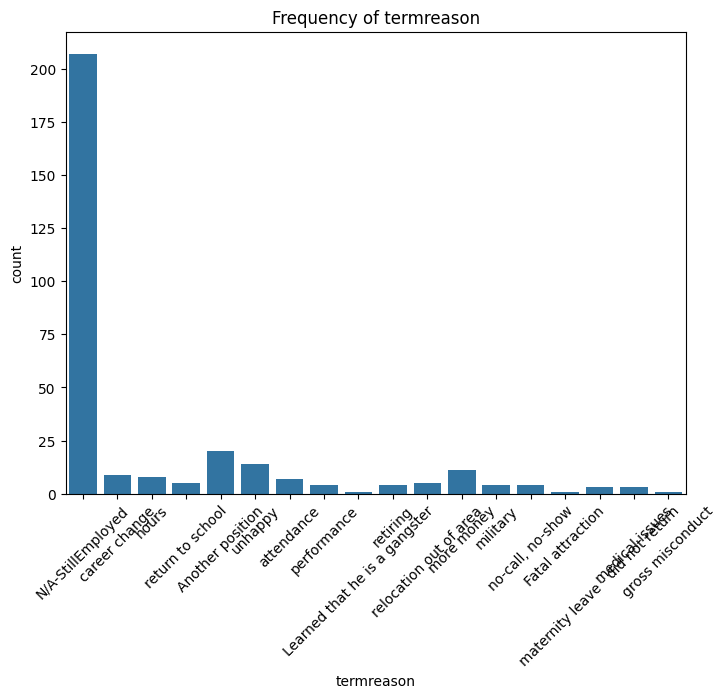


Frequency for employmentstatus:
employmentstatus
Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: count, dtype: int64


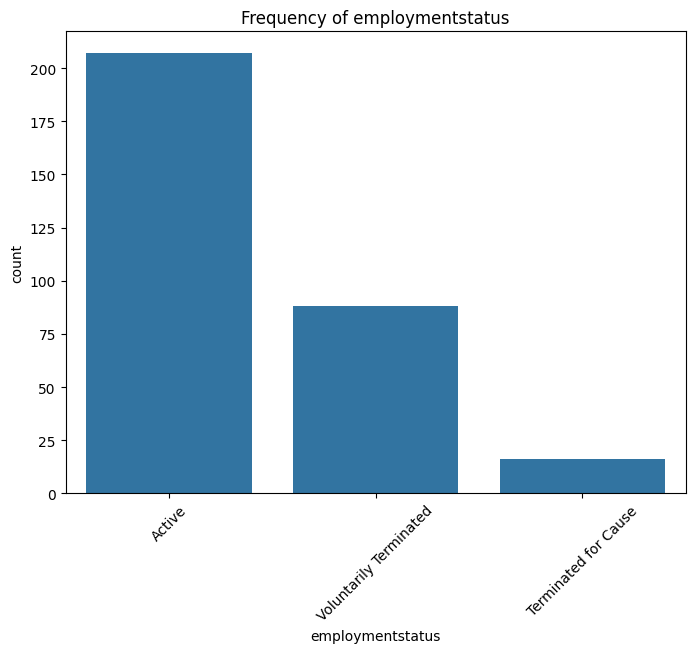


Frequency for department:
department
Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: count, dtype: int64


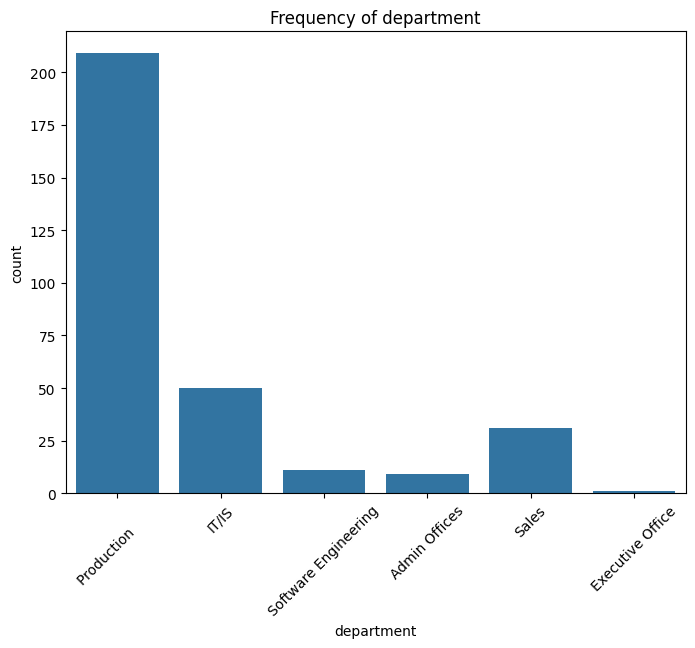


Frequency for recruitmentsource:
recruitmentsource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64


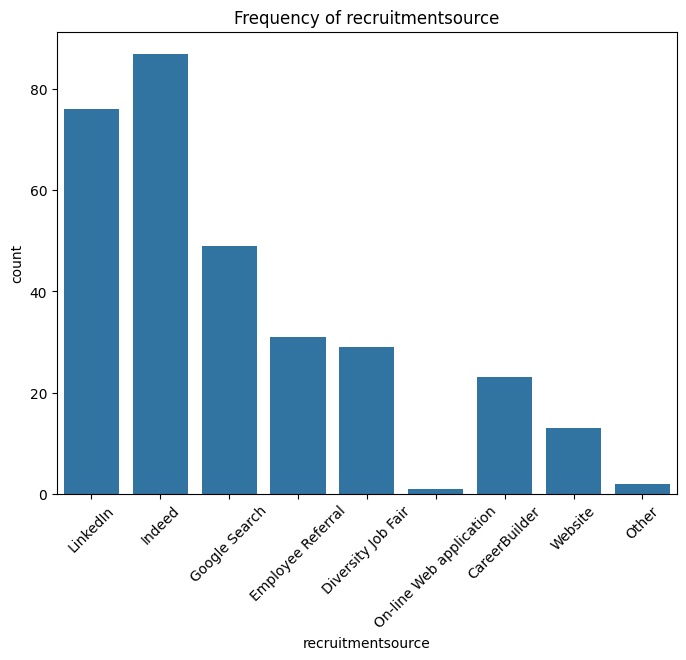


Frequency for performancescore:
performancescore
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: count, dtype: int64


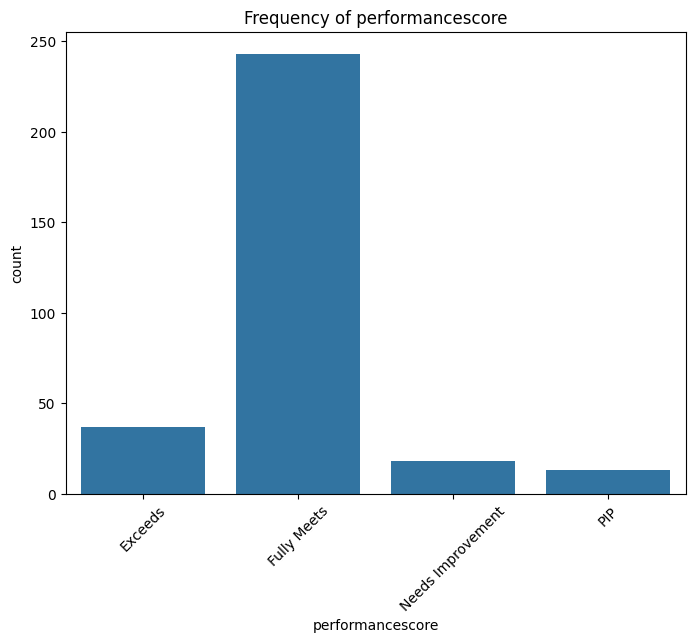


Frequency for agegroup:
agegroup
40-49    126
30-39     94
50-59     68
60-69     15
70+        8
20-29      0
<20        0
Name: count, dtype: int64


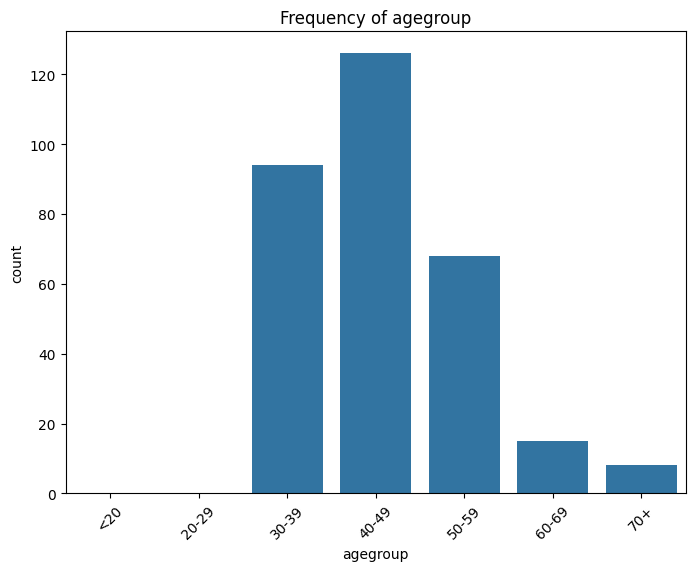


Frequency for salarygroup:
salarygroup
45K-70K      222
70K-100K      64
100K-150K     18
150K-200K      5
200K+          1
<45K           0
Name: count, dtype: int64


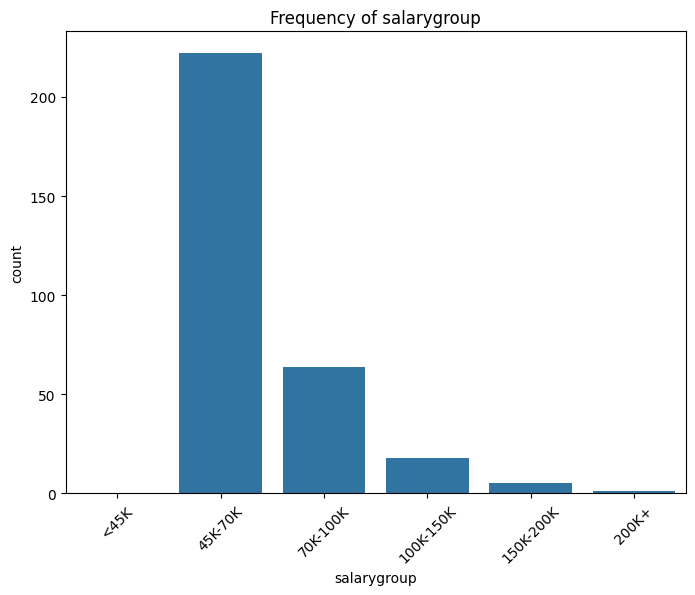


Frequency for yearsemployedgroup:
yearsemployedgroup
10-14    162
0-4       78
5-9       63
15-19      8
Name: count, dtype: int64


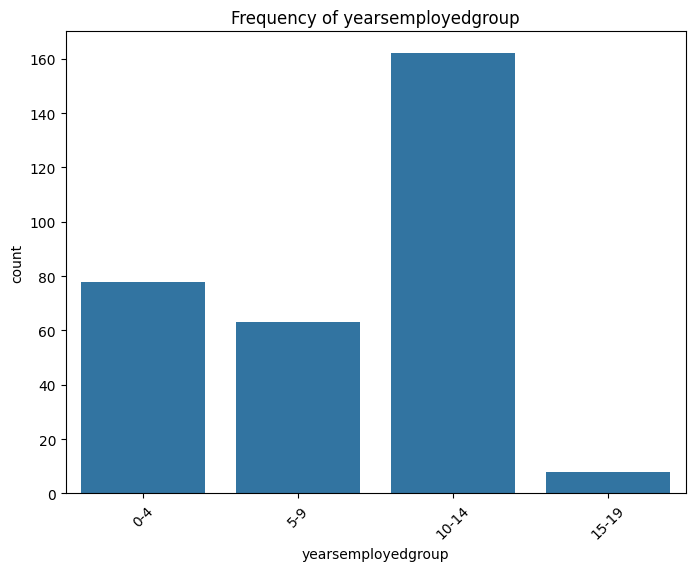

In [16]:
#importlib.reload()
descriptive_statistics(hrdata_cleaned)

In [ ]:
# Histograms: Visualizing distributions of key numerical factors related to attrition
plot_histograms(hrdata_cleaned, selected_columns=["age", "salary", "empsatisfaction", "years_employed"])

# Boxplots: Detecting outliers in salary, absences, and job satisfaction levels
plot_boxplots(hrdata_cleaned, selected_columns=["salary", "absences", "empsatisfaction", "dayslatelast30"])

# Scatter Matrix: Analyzing relationships between salary, employee satisfaction, tenure, and performance
plot_scatter_matrix(hrdata_cleaned, selected_columns=["salary", "empsatisfaction", "years_employed", "perfscoreid"])

## Attrition Rate Analysis
- Helps identify high-risk groups.

In [ ]:
#importlib.reload()
attrition_col = "attrition"
categorycol = ['agegroup','salarygroup', 'sex', 'maritaldesc', 'racedesc', 'department', 'position', 
               'employmentstatus', 'yearsemployedgroup', 'empsatisfaction','performancescore']

attrition_rate = calculate_attrition_rate(hrdata_cleaned,attrition_col)
plot_attrition_by_category(hrdata_cleaned, category_columns=categorycol, attrition_column=attrition_col)

## Correlation Analysis

In [ ]:
#importlib.reload() 
sel_col = ['empsatisfaction', 'salary', 'perfscoreid', 'years_employed', 'dayslatelast30', 'absences']
plot_attrition_correlation(hrdata_cleaned, attrition_column= attrition_col, selected_columns=sel_col)

In [ ]:
hrdata_cleaned.info()

- The dataset indicates a higher percentage of female employees (55.5%) compared to male employees (44.5%). This suggests that the organization has a more diverse gender representation, with a majority of its workforce being female.

**Marital Status Distribution**

In [ ]:
# Count employees by marital status
marital_status_counts = hrdata1['maritaldesc'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values)
plt.xlabel("Marital Status")
plt.ylabel("Employee Count")
plt.title("Employee Count by Marital Status")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- The majority of employees are either Single or Married, each with counts close to 100. This indicates that the workforce is predominantly comprised of individuals who are either single or married.
- while categories such as Divorced, Widowed, and Separated have significantly fewer employees. This insight suggests that the organization may have policies or support systems that cater well to these groups

In [ ]:
# Distribution of age groups
hrdata['AgeGroup'].value_counts()

**Key Insights:**

*Dominant Age Groups:*
- The majority of employees are in the 40-49 age group (122 employees), followed by the 30-39 age group (105 employees). These two groups together make up a significant portion of the workforce.
- The 50-59 age group is also notable, with 64 employees, indicating a considerable number of employees nearing retirement age.
  
*Older Workforce:*
- There are 14 employees in the 60-69 age group and 6 employees in the 70+ age group. This indicates that there are employees who are either at or beyond traditional retirement age, suggesting possible trends of delayed retirement or valuable retention of experienced staff.
*Lack of Younger Employees:*
- There are no employees in the <20 or 20-29 age groups. This could suggest a gap in hiring younger, possibly entry-level talent or recent graduates. This might impact the organization's future talent pipeline and succession planning.


**Recommendations:**
- Talent Acquisition and Succession Planning: Recruit Younger Employees: Develop strategies to attract younger talent, such as partnerships with universities, internships, and entry-level positions. This will help create a balanced age distribution and ensure the organization's long-term sustainability.
- Succession Planning: With a significant portion of the workforce in the 40-59 age range, it's essential to implement succession planning to prepare for retirements and ensure continuity in key roles.
- Employee Retention Programs: Retain Experienced Employees: For employees in the 50-59 and 60+ age groups, consider flexible working arrangements, phased retirement options, and knowledge transfer programs to retain their expertise while planning for future transitions.
- Diversity and Inclusion Initiatives: Promote age diversity by creating an inclusive workplace that values contributions from all age groups. Tailor development programs to meet the needs of different age groups, ensuring that all employees feel valued and supported.
- Engagement and Training: Engagement Programs: Implement targeted engagement programs to keep employees in the 40-49 and 50-59 age groups motivated and productive. This could include career development opportunities, wellness programs, and recognition initiatives.
- Training and Development: Provide ongoing training and development opportunities to upskill employees, especially those nearing retirement age, to keep them engaged and contributing effectively.
- Workforce Analytics: Continuously monitor and analyze workforce demographics to identify trends and adjust recruitment, retention, and development strategies accordingly. This proactive approach will help maintain a balanced and effective workforce.

### Salary Analysis

In [ ]:
# Salary distribution by department
hrdata.groupby('Department', observed=False)['Salary'].describe()

In [ ]:
# Salary disparity analysis by sex and race
hrdata.groupby(['RaceDesc', 'Sex'], observed=False)['Salary'].mean()

**Key Observations:**
- Highest Mean Salary: The Executive Office has the highest mean salary at 250,000, but this is based on a single data point.
- High Salaries in IT/IS and Software Engineering: Both IT/IS (97,064.64) and Software Engineering (94,989.45) departments have high mean salaries compared to other departments.
- Lower Salaries in Production: The Production department has the lowest mean salary at 59,953.55 with a smaller spread, indicating relatively lower but more consistent salaries.
- Sales and Admin Offices: Both departments have intermediate mean salaries but show significant variation within each department.

*Gender Disparities:*
- In most racial groups, males tend to earn more than females. For example, Black or African American males earn 85,066.12 on average, compared to 66,963.83 for females. **An exception is observed in the White racial group, where females earn more (68,846.52) compared to males (65,334.13).**
- Racial Disparities: Among males, Black or African American and Hispanic employees have the highest average salaries (85,066.12 and 83,667.00, respectively).
- Among females, the highest average salary is found in the American Indian or Alaska Native group ($63,436.50), with no data available for Hispanic females.

**Recommendations:**
- Address Gender Pay Gap: Conduct a detailed review of salary policies and practices to identify and address the root causes of gender-based pay disparities. Implement transparent and fair pay structures. **Promote gender diversity in higher-paying roles and ensure equal opportunities for promotions and salary increases.**
- Promote Racial Pay Equity: Investigate the reasons behind the pay disparities across different racial groups. Provide training and development opportunities to underrepresented groups to promote career advancement. **Develop targeted initiatives to support higher-paying roles for minorities, ensuring equitable pay practices.**
- Regular Salary Audits: Conduct regular salary audits to monitor and address pay disparities. Use these audits to make data-driven decisions and adjustments to salary structures.
- Enhance Employee Support Programs: Implement programs aimed at supporting underrepresented groups, such as mentorship, sponsorship, and leadership development programs.
- Transparency and Communication: Increase transparency around salary structures and ensure clear communication with employees about how salaries are determined and adjusted.

### Employee Turnover Analysis

In [ ]:
hrdata['Termd'].value_counts()

**Key Insights:**
- A total of 311 employees are represented in the dataset.
- Out of these, 207 employees (66.6%) are currently employed, while 104 employees (33.4%) have been terminated.
- The termination rate is 33.4%. This indicates that approximately one-third of the employees in the dataset have been terminated. *Understanding the reasons behind terminations is crucial for retention strategies.*
- The majority of employees (66.6%) remain employed, suggesting a relatively stable employment environment.

**Recommendations:**

- Analyze Termination Reasons: Investigate the reasons behind the terminations. Understanding whether terminations are due to performance issues, voluntary resignations, layoffs, or other factors can provide deeper insights into the workforce dynamics and help in developing strategies to reduce the termination rate.
- Employee Retention Strategies: Implement and enhance retention strategies to reduce the termination rate. This can include improving employee engagement, job satisfaction, career development opportunities, and work-life balance initiatives.
- Regular Monitoring: Continuously monitor termination trends and analyze if there are any patterns or specific periods with higher termination rates. This can help in proactively addressing issues before they lead to terminations.
- Exit Interviews: Conduct thorough exit interviews with terminated employees to gather feedback on their reasons for leaving and identify any common issues that can be addressed to improve retention.
- Support for At-Risk Employees:Identify employees who may be at risk of termination and provide them with additional support and resources, such as performance improvement plans, mentoring, and counseling.

By understanding the termination trends and implementing targeted strategies, the organization can work towards reducing the termination rate, improving employee satisfaction, and creating a more stable and productive work environment.

In [ ]:
# Termination rates by department
termination_rates=hrdata.groupby('Department',observed=False)['Termd'].mean()

# Plotting the termination rate
plt.figure(figsize=(10, 8))
termination_rates.plot(kind='pie', autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Termination Rate by Department')
plt.ylabel('')  # Remove ylabel
plt.tight_layout()
plt.show()

**Key Insights:**

*High Termination Rates:*
- Production (0.397129): The Production department has the highest termination rate, with nearly 40% of employees being terminated. This is significantly higher than other departments.
> - This could be due to various factors such as high job demands, poor working conditions, lack of job satisfaction, or ineffective management practices. This high rate is a red flag and indicates the need for an in-depth analysis to identify and address the underlying causes.
- Software Engineering (0.363636): The Software Engineering department also has a high termination rate, with over 36% of employees being terminated.
> - suggests potential issues that need to be investigated. Factors could include job stress, work-life balance challenges, or misalignment between job expectations and reality.

*Moderate Termination Rates:*
- Admin Offices (0.222222): The Admin Offices have a moderate termination rate of about 22%.
- IT/IS (0.200000): The IT/IS department has a similar termination rate of 20%.
> - indicate a more stable environment, but there's still room for improvement. Understanding the reasons behind terminations in these departments can help reduce the rates further.

*Low Termination Rates:*
- Sales (0.161290): The Sales department has a relatively low termination rate of about 16%.
> - suggests that employees are generally more satisfied or better suited to their roles. This department could serve as a model for best practices in employee retention.
- Executive Office (0.000000): The Executive Office has the lowest termination rate, with no terminations reported.
> - The absence of terminations in the Executive Office might reflect a stable and well-managed environment. However, the small size of this department could also be a factor.

In [ ]:
# Reasons for termination frequency
# Filter the data for terminated employees (Termd = 1)
terminated_data = hrdata[hrdata['Termd'] == 1]

# Calculate termination reason frequency by department
term_reason_counts = terminated_data.groupby(['Department', 'TermReason'], observed=False).size().unstack()
#term_reason_counts = term_reason_counts.fillna('-')
#term_reason_counts

In [ ]:
# Get list of departments
departments = term_reason_counts.index

# Plotting bar chart for each department
plt.figure(figsize=(15, 10))

# Iterate over departments
for i, department in enumerate(departments):
    department_data = term_reason_counts.loc[department]
    
    # Filter out departments with all zero counts
    if department_data[department_data != 0].empty:
        continue
    
    ax = plt.subplot(3, 2, i + 1)
    department_data[department_data != 0].plot(kind='bar', ax=ax)
    
    ax.set_title(f'TermReason Distribution - {department}')
    ax.set_xlabel('TermReason')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout and set super title
plt.tight_layout()
plt.suptitle('TermReason Distribution by Department', y=1.02, fontsize=16)
plt.show()

**Insights:**

*High Turnover in Production Department:*
- The production department has the highest number of terminations (79 instances in total), with the leading reasons being "Another position" (17 instances), "More money" (11 instances), and "Unhappiness" (14 instances).
> This suggests a need to address job satisfaction, compensation, and career opportunities in this department.

- Unhappiness in the Production Department:  With 14 instances of terminations due to "Unhappiness", there is a significant indication of job dissatisfaction within the production department. Understanding the root causes of this unhappiness could help mitigate turnover.

*IT/IS Department Challenges:*
- The IT/IS department has terminations for a variety of reasons, with notable instances being "Another position", "Learned that he is a gangster", "No-call, no-show", and "Performance issues".
> This indicates potential challenges in retention and employee screening processes.

*Retention Issues Related to Career and Compensation:*
- Across several departments, terminations due to seeking "Another position", "More money", and "Career change" are common.
> This highlights a potential need for better career development programs, competitive salaries, and engagement strategies.

*Limited Issues in Administrative and Executive Offices:*
- These departments show minimal to no terminations, suggesting stable environments. However, this could also be due to the smaller size of these departments.

**Recommendations:**
- Improve Job Satisfaction and Engagement: Focus on improving job satisfaction, especially in the Production department. Conduct employee surveys to understand specific grievances and address them proactively.
- Competitive Compensation Packages: Review and adjust compensation packages to ensure they are competitive within the industry, particularly for roles in high-turnover departments like Production and IT/IS.
- Career Development Opportunities: Implement robust career development and progression plans to retain employees seeking new positions or career changes.
- Enhance Screening and Onboarding Processes: Strengthen employee screening and onboarding processes, especially in departments with unique termination reasons such as IT/IS.
- Flexible Work Arrangements: Offer flexible work arrangements where possible, particularly in departments like IT/IS and Software Engineering, to improve work-life balance and reduce turnover.
- Address Specific Issues in the Production Department: Given the diverse reasons for termination in Production, conduct a detailed analysis to identify key areas for improvement, such as work environment, management practices, and employee well-being.

### Performance Analysis

In [ ]:
# Performance score distribution
hrdata['PerformanceScore'].value_counts()

In [ ]:
# Correlation between performance score and salary
#hrdata[['PerfScoreID', 'Salary']].corr()

# Correlation between performance score and salary
contingency_table1 = pd.crosstab(hrdata['PerfScoreID'], [hrdata['Salary']])

# Perform chi-squared test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table1)

# Interpret the results
if p < 0.05:
    print(f"There is a significant association between PerfScoreID and Salary. p-value = {p:.4f}")
else:
    print(f"There is no significant association between PerfScoreID and Salary. p-value = {p:.4f}")


*This analysis suggests that variations in performance scores (PerfScoreID) do not significantly correlate with differences in salaries across the dataset. This finding could imply:*
- The majority of employees (243) are meeting expectations ("Fully Meets"), suggesting that the current performance evaluation criteria are generally effective in meeting organizational standards.
- The organization may have a salary structure that is independent of individual performance scores, possibly based on other factors such as job role, experience, or market competitiveness.
- While performance scores are important for feedback and development, they may not directly influence salary decisions in this context.

**Insight can be used to refine performance management strategies, including targeted training, mentoring, or coaching where needed while evaluating the salary structure and considering if adjustments are needed to better align with performance outcomes or to incentivize higher performance levels.**

### Engagement and Satisfaction Analysis

In [ ]:
# Average engagement survey score by department
hrdata.groupby('Department',observed=False)['EngagementSurvey'].mean()

In [ ]:
# Factors influencing engagement
hrdata[['EngagementSurvey', 'Salary', 'PerfScoreID', 'SpecialProjectsCount']].corr()

- The Executive Office has the highest average engagement score (4.830), indicating potentially strong leadership and organizational alignment at the executive level.
- Conversely, the Sales department has the lowest average engagement score (3.819), suggesting potential areas for improvement in employee satisfaction and organizational culture within the sales team.

- The engagement survey scores show a moderate positive correlation (r = 0.545) with performance scores suggesting that employees who perceive their performance positively tend to have higher engagement levels.
- Engagement scores show a weak correlation with salary (r = 0.065) and special projects count (r = 0.013) implying that while salary and involvement in special projects may contribute to employee satisfaction and motivation, they have limited impact on overall engagement levels as measured by the survey.

**Recommendation**
- Tailor engagement initiatives based on department-specific survey results. For example, focus on leadership development and team-building in departments with lower engagement scores like Sales.
- Strengthen performance management practices to provide regular feedback and recognition, potentially boosting engagement across departments.
- Consider a holistic approach to engagement that includes non-monetary incentives, career development opportunities, and fostering a positive work environment aligned with organizational values.

By leveraging these insights, the company can refine its strategies to enhance employee engagement, improve overall organizational performance, and foster a more motivated and satisfied workforce.

### Attendance and Punctuality Analysis

In [ ]:
# Absences by department
hrdata.groupby('Department',observed=False)['Absences'].mean()

In [ ]:
# Relationship between engagement and attendance
hrdata[['EngagementSurvey', 'Absences']].corr()

In [ ]:
# Factors influencing Attendance & Punctuality
hrdata[['EngagementSurvey', 'Salary', 'SpecialProjectsCount','EmpSatisfaction', 'Absences']].corr()

- Sales department has the highest average number of absences at 11.55 days, indicating potential issues  such as high job stress, lack of engagement, or other departmental challenges that need to be addressed to improve attendance.
- Unlike Admin Offices and Software Engineering, the lowest average absences at 8.67 and 8.73 days, respectively, might suggest better engagement, job satisfaction, or effective attendance policies in place.
  
**Factors Influencing Attendance:**
- Salary shows a weak positive correlation with absences and a moderate correlation with special projects, suggesting that financial incentives and involvement in projects are relevant but not strongly predictive of attendance.
- Engagement levels and special project involvement show minimal impact on absence rates, indicating other factors might be more significant in influencing attendance and punctuality.
- Employee satisfaction has a weak positive correlation with absences, suggesting that higher satisfaction might slightly correlate with more absences, which could be an area for further investigation to understand underlying reasons.

### Manager Performance Analysis

In [ ]:
# Performance evaluation of managers and absentism
hrdata.groupby('ManagerID').agg(
    EmployeeCount=('EmpID', 'count'),
    AveragePerfScore=('PerfScoreID', 'mean'),
    AverageAbsceScore=('Absences', 'mean'))

**Performance and Absence Correlation:**
-  ManagerID 17.0 and 30.0: Both managers have high average absence scores (13.36 and 16.00 days respectively) and relatively low performance scores (2.71 and 3.00 respectively) suggesting a potential correlation where higher absence rates may impact performance scores negatively.
-  ManagerID 6.0: Despite having the highest average performance score (3.25), the absence score is relatively moderate (9.00 days), indicating effective management practices that maintain performance without excessive absences
-  Several managers have an average performance score of exactly 3.0, indicating consistent performance evaluations and might be applying performance evaluation standards uniformly.  *However, it might be useful to review if this consistency reflects accurate performance assessments or if there's a tendency to avoid giving higher or lower scores.*
  
- It’s notable that managers with a higher number of employees (e.g., ManagerIDs 12.0, 16.0, and 18.0) have varying average performance scores. *Analyzing workload and its impact on management effectiveness could be beneficial.*
These managers have low average performance scores (2.818182 and 2.857143) with relatively high employee counts (22 and 21 employees respectively) and moderate to high absence scores (9.18 and 10.67 days respectively). *These managers might benefit from targeted support and training to address potential challenges in managing larger teams.*
- Managers with high average performance scores, such as ManagerID 6.0, could share best practices and management techniques that contribute to better employee performance. *Their absence scores are moderate (ranging from 9.00 to 9.29 days), indicating a balance between maintaining high performance and managing absences effectively. They could share best practices with other managers.*

- ManagerID 15.0 and 17.0 have low performance scores (2.666667 and 2.714286) and varying absence scores (8.67 and 13.36 days respectively). Focused interventions could help improve both performance and attendance in their teams.

- ManagerID 30.0: Despite managing only 1 employee, the high absence score (16.00 days) could indicate specific issues impacting both attendance and performance, which might need to be addressed individually.

## Recruitment Source Effectiveness

In [ ]:
# Performance by recruitment source
hrdata.groupby('RecruitmentSource', observed=False).agg(
    AveragePerfScore=('PerfScoreID', 'mean'),
    AverageTermScore=('Termd', 'mean'))

**Insights:**

*Employee Referral Program Effectiveness:*
- Employees referred by existing staff have the highest average performance scores and one of the lowest termination rates, indicating that referrals are a reliable source of high-performing, stable employees.

*Online Web Applications:*
- Although employees hired through on-line web applications have an average performance score of 3.000000, the termination rate is extremely high (1.000000). This suggests potential issues with the recruitment process or the suitability of candidates hired through this source.
  
*Performance vs. Termination Rate Correlation:*
- Google Search and CareerBuilder: Both sources have moderate average performance scores and relatively high termination rates, suggesting these sources might attract candidates who are less likely to remain with the company long-term.

*Website Hires:*
- While employees hired through the company's website have the lowest average performance scores, they also have the lowest termination rate, suggesting these hires are more stable but might need additional support to enhance performance.
  
**Recommendations:**
- Enhance Employee Referral Program: Given the high performance and low termination rates of referred employees, expand and incentivize the employee referral program. Encourage employees to refer high-quality candidates and consider offering additional rewards for successful hires.
- Review and Improve Online Application Process:Investigate the high termination rate for employees hired through on-line web applications. Assess the screening and evaluation process for these applicants and consider enhancing pre-employment assessments to ensure a better fit for the company.
- Targeted Training and Support:Provide targeted training and development programs for employees hired through sources with lower performance scores, such as Website hires. This can help improve their performance and ensure they contribute effectively to the organization.
- Diversify Recruitment Channels:Continue leveraging high-performing recruitment sources like Employee Referral and LinkedIn, but also explore and test other recruitment channels to ensure a diverse and high-quality talent pool.
- Monitor and Adjust Recruitment Strategies:Regularly monitor the performance and retention rates of employees hired from different sources. Use this data to continually refine and optimize recruitment strategies, focusing on sources that yield the best combination of high performance and low turnover.

### Special Projects Impact

In [ ]:
# Impact on engagement, performance score and satisfaction
hrdata[['SpecialProjectsCount', 'PerfScoreID', 'EngagementSurvey', 'EmpSatisfaction']].corr()

**Key Insights:**

*Special Projects and Performance:*
- Low Correlation (0.045677): The number of special projects assigned to employees has a very weak positive correlation with performance scores. This indicates that simply assigning more projects does not significantly impact performance scores.
*Performance and Engagement:*
-  Moderate Correlation (0.544927): There is a moderate positive correlation between performance scores and engagement survey scores. Higher engagement levels are associated with better performance, suggesting that engaged employees tend to perform better.
*Performance and Employee Satisfaction:*
- Moderate Correlation (0.303579): There is a moderate positive correlation between performance scores and employee satisfaction. Employees who are more satisfied with their job tend to have higher performance scores.
*Engagement and Satisfaction:*
- Weak Correlation (0.187105): There is a weak positive correlation between engagement survey scores and employee satisfaction. While related, engagement and satisfaction do not strongly influence each other, indicating that they are somewhat independent factors.
*Special Projects and Other Factors:*
- Very Low Correlations: The number of special projects shows very low correlations with engagement survey scores (0.013227) and employee satisfaction (0.033877). This suggests that assigning special projects does not significantly impact engagement or satisfaction.

**Recommendations:**
- Enhance Employee Engagement: 
Since engagement has a moderate positive correlation with performance, focus on initiatives that boost employee engagement. This could include recognition programs, career development opportunities, and a positive work environment.
- Increase Job Satisfaction: Given the moderate correlation between satisfaction and performance, consider strategies to improve job satisfaction. This could involve offering competitive benefits, fostering a supportive work culture, and providing opportunities for growth and advancement.
- Balanced Workload for Special Projects: Since the number of special projects does not significantly impact performance, engagement, or satisfaction, ensure that special project assignments are balanced and do not overwhelm employees. Focus on the quality of projects rather than quantity.
- Holistic Approach to Performance Management:Address both engagement and satisfaction to improve performance. Tailor interventions to address the unique needs of employees and departments. This holistic approach can lead to sustained performance improvements.
- Monitor and Adjust Strategies: Regularly assess the impact of engagement and satisfaction initiatives on performance. Use employee feedback to continuously refine strategies and ensure they are effective.
By focusing on enhancing engagement and satisfaction while balancing special project assignments, the organization can improve overall employee performance and well-being.

### Age and Tenure Analysis

In [ ]:
# Age distribution by department
hrdata.groupby('DeptID')['DOB'].apply(lambda x: 2024 - pd.to_datetime(x).dt.year).describe()

**Key Observations:**

*Age Range and Diversity:*
- The ages of employees range widely from 32 to 73 years, indicating a diverse age group within the organization.
The mean age of 45.41 suggests a mature workforce with substantial experience.
*Quartile Analysis:*
- 25th Percentile (Q1): 25% of employees are younger than 38 years.
- 50th Percentile (Median): The median age is 44 years, meaning half of the employees are younger and half are older.
- 75th Percentile (Q3): 25% of employees are older than 51 years.
*Standard Deviation:*
- A standard deviation of 8.87 years indicates moderate variability in the ages of employees, reflecting a balance between younger and older employees.
*Extremes:*
- The minimum age of 32 years shows the presence of relatively younger employees, potentially in entry-level or early career positions.
- The maximum age of 73 years reflects a small number of employees who are likely very experienced or in senior roles.

*Departmental Age Distribution:*
- While the overall statistics provide a high-level view, analyzing age distribution by department would reveal more specific insights regarding age diversity in different areas of the organization.

**Recommendations:**
- Succession Planning: Given the mature workforce, implement robust succession planning to ensure knowledge transfer and prepare for retirements, particularly for employees approaching the upper age limit.
- Training and Development: Develop tailored training programs to meet the needs of different age groups. Younger employees may benefit from skill-building and career advancement programs, while older employees might prefer opportunities for leadership development and mentoring roles.
- Workforce Balance: Maintain a balanced age distribution across departments to foster innovation and stability. Encourage intergenerational collaboration to leverage the strengths of both younger and more experienced employees.
- Health and Wellness Programs:Offer health and wellness programs that cater to a diverse age range. This could include fitness programs, mental health support, and ergonomic assessments to ensure a healthy and productive workforce.
- Retention Strategies:Create retention strategies that address the unique needs of different age groups. Younger employees might value career growth opportunities, while older employees may prioritize job security and retirement planning support.

In [ ]:
# Relationship between tenure and performance
hrdata['Tenure'] = hrdata['DateofHire'].apply(lambda x: 2024 - pd.to_datetime(x).year)
hrdata[['Tenure', 'PerfScoreID']].corr()

**Key Insights:**

*Weak Correlation:*
- The correlation between tenure and performance score is 0.039831, which indicates a very weak positive relationship. This suggests that the length of time an employee has been with the company has little to no impact on their performance score.
- Implications of Weak Correlation: Employees who have been with the company for a longer period do not necessarily perform better or worse than those with shorter tenures. Performance is relatively independent of how long employees have been employed at the company.

**Recommendations:**
- Focus on Individual Development: Since tenure does not significantly impact performance, focus on individual development plans and continuous performance management. Tailor development programs to meet the unique needs of each employee regardless of their tenure.
- Regular Performance Reviews: Implement regular performance reviews to provide ongoing feedback and support. This will help identify areas of improvement and recognize high performers irrespective of their tenure.
- Mentorship Programs: Pair experienced employees with newer ones through mentorship programs. While tenure does not directly impact performance, experienced employees can share valuable insights and best practices that contribute to overall team performance.
- Performance-Based Incentives: Consider performance-based incentives rather than tenure-based rewards. Recognize and reward employees based on their contributions and achievements to encourage high performance across all tenure levels.
- Continuous Learning Opportunities: Offer continuous learning and development opportunities to all employees. Encourage skill development and career growth to enhance performance, keeping employees engaged and motivated.